In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import display, Markdown
import pyperclip
import warnings
warnings.filterwarnings('ignore')

## DATAFRAMES POR INSTANCIA

In [14]:
# Leer los datos del archivo csv en el archivo de la carpeta output y guardarlos en un dataframe
df = pd.read_csv('../output/results.csv')
df

,Filename,Depositos,Vendedores,Greedy_cost,Greedy_time,Greedy_free,Binpacking_cost,Binpacking_time,Binpacking_free,Swap(Greedy)_cost,...,Swap+Relocate(Bin Packing)_free,Relocate+Swap(Greedy)_cost,Relocate+Swap(Greedy)_time,Relocate+Swap(Greedy)_free,Relocate+Swap(Bin Packing)_cost,Relocate+Swap(Bin Packing)_time,Relocate+Swap(Bin Packing)_free,Meta_cost,Meta_time,Meta_free
0,a05100,5,100,1709.0,0.124000,0,3206.0,0.319166,0,1700.0,...,0,1700.0,1.12900,0,1698.0,19.7359,0,1693.0,14,0
1,a20100,20,100,1170.0,0.074291,0,2972.0,0.317458,0,1168.0,...,0,1167.0,1.42608,0,1161.0,37.9035,0,1168.0,37,0
2,a10100,10,100,1390.0,0.053458,0,2954.0,0.159500,0,1367.0,...,0,1365.0,2.00925,0,1363.0,27.1790,0,1369.0,24,0
3,a05200,5,200,3259.0,0.084375,0,6075.0,0.199208,0,3238.0,...,0,3238.0,6.18304,0,3235.0,140.6130,0,3235.0,56,0
4,a20200,20,200,2371.0,0.151541,0,5855.0,0.619250,0,2353.0,...,0,2353.0,7.60012,0,2345.0,253.4420,0,2349.0,132,0
5,a10200,10,200,2670.0,0.107666,0,6183.0,0.337083,0,2632.0,...,0,2628.0,15.96070,0,2629.0,204.8590,0,2633.0,139,0
6,b10200,10,200,8255.0,0.092834,42,6031.0,0.322792,0,7788.0,...,0,6779.0,83.18900,33,3007.0,171.2940,0,2993.0,90,0
7,b20200,20,200,3628.0,0.148750,7,5860.0,0.638375,0,3335.0,...,0,2439.0,63.50250,0,2437.0,252.0290,0,2426.0,183,0
8,b05200,5,200,8050.0,0.072292,40,6059.0,0.199792,0,7487.0,...,0,7444.0,73.56130,37,3640.0,122.2050,0,3617.0,71,0
9,b10100,10,100,2115.0,0.053875,4,2980.0,0.167958,0,1952.0,...,0,1500.0,7.59887,0,1439.0,29.0547,0,1443.0,22,0


In [15]:
# column name contains the word cost
heuristics = df.columns[df.columns.str.contains('cost')].map(lambda x: x.split('_')[0]).unique()
heuristics

Index(['Greedy', 'Binpacking', 'Swap(Greedy)', 'Swap(Bin Packing)',
       'Relocate(Greedy)', 'Relocate(Bin Packing)', 'Swap+Relocate(Greedy)',
       'Swap+Relocate(Bin Packing)', 'Relocate+Swap(Greedy)',
       'Relocate+Swap(Bin Packing)', 'Meta'],
      dtype='object')

In [16]:
df["InstanceGroup"] = df["Filename"].str[0]
df

,Filename,Depositos,Vendedores,Greedy_cost,Greedy_time,Greedy_free,Binpacking_cost,Binpacking_time,Binpacking_free,Swap(Greedy)_cost,...,Relocate+Swap(Greedy)_cost,Relocate+Swap(Greedy)_time,Relocate+Swap(Greedy)_free,Relocate+Swap(Bin Packing)_cost,Relocate+Swap(Bin Packing)_time,Relocate+Swap(Bin Packing)_free,Meta_cost,Meta_time,Meta_free,InstanceGroup
0,a05100,5,100,1709.0,0.124000,0,3206.0,0.319166,0,1700.0,...,1700.0,1.12900,0,1698.0,19.7359,0,1693.0,14,0,a
1,a20100,20,100,1170.0,0.074291,0,2972.0,0.317458,0,1168.0,...,1167.0,1.42608,0,1161.0,37.9035,0,1168.0,37,0,a
2,a10100,10,100,1390.0,0.053458,0,2954.0,0.159500,0,1367.0,...,1365.0,2.00925,0,1363.0,27.1790,0,1369.0,24,0,a
3,a05200,5,200,3259.0,0.084375,0,6075.0,0.199208,0,3238.0,...,3238.0,6.18304,0,3235.0,140.6130,0,3235.0,56,0,a
4,a20200,20,200,2371.0,0.151541,0,5855.0,0.619250,0,2353.0,...,2353.0,7.60012,0,2345.0,253.4420,0,2349.0,132,0,a
5,a10200,10,200,2670.0,0.107666,0,6183.0,0.337083,0,2632.0,...,2628.0,15.96070,0,2629.0,204.8590,0,2633.0,139,0,a
6,b10200,10,200,8255.0,0.092834,42,6031.0,0.322792,0,7788.0,...,6779.0,83.18900,33,3007.0,171.2940,0,2993.0,90,0,b
7,b20200,20,200,3628.0,0.148750,7,5860.0,0.638375,0,3335.0,...,2439.0,63.50250,0,2437.0,252.0290,0,2426.0,183,0,b
8,b05200,5,200,8050.0,0.072292,40,6059.0,0.199792,0,7487.0,...,7444.0,73.56130,37,3640.0,122.2050,0,3617.0,71,0,b
9,b10100,10,100,2115.0,0.053875,4,2980.0,0.167958,0,1952.0,...,1500.0,7.59887,0,1439.0,29.0547,0,1443.0,22,0,b


In [17]:
# Separo las instancias
a_instance = df[df["InstanceGroup"] == "a"]
b_instance = df[df["InstanceGroup"] == "b"]
e_instance = df[df["InstanceGroup"] == "e"]
real_instance = df[df["InstanceGroup"] == "r"]


In [18]:
len(df)

28

In [19]:
# join a_instance[['Depositos', 'Vendedores']] with b_instance[['Depositos', 'Vendedores']] with e_instance[['Depositos', 'Vendedores']] with real_instance[['Depositos', 'Vendedores']]

# rename columns

a_table = a_instance[['Depositos', 'Vendedores']].rename(columns={'Depositos': 'Depositos_a', 'Vendedores': 'Vendedores_a'}).reset_index(drop=True)
b_table = b_instance[['Depositos', 'Vendedores']].rename(columns={'Depositos': 'Depositos_b', 'Vendedores': 'Vendedores_b'}).reset_index(drop=True)
e_table = e_instance[['Depositos', 'Vendedores']].rename(columns={'Depositos': 'Depositos_e', 'Vendedores': 'Vendedores_e'}).reset_index(drop=True)

# join tables
table = pd.concat([a_table, b_table, e_table], axis=1).fillna("")
print(table.to_markdown(index=False))

| Depositos_a   | Vendedores_a   | Depositos_b   | Vendedores_b   |   Depositos_e |   Vendedores_e |
|:--------------|:---------------|:--------------|:---------------|--------------:|---------------:|
| 5.0           | 100.0          | 10.0          | 200.0          |            40 |           1600 |
| 20.0          | 100.0          | 20.0          | 200.0          |            15 |            900 |
| 10.0          | 100.0          | 5.0           | 200.0          |            60 |            900 |
| 5.0           | 200.0          | 10.0          | 100.0          |            80 |           1600 |
| 20.0          | 200.0          | 20.0          | 100.0          |            30 |            900 |
| 10.0          | 200.0          | 5.0           | 100.0          |            40 |            400 |
|               |                |               |                |            20 |           1600 |
|               |                |               |                |            20 |        

In [20]:
# Get "Depositos", "Vendedores" columns from a instance
print(e_instance[['Depositos', 'Vendedores']].to_markdown(index=False))

|   Depositos |   Vendedores |
|------------:|-------------:|
|          40 |         1600 |
|          15 |          900 |
|          60 |          900 |
|          80 |         1600 |
|          30 |          900 |
|          40 |          400 |
|          20 |         1600 |
|          20 |          400 |
|          10 |          400 |
|           5 |          100 |
|          10 |          100 |
|          20 |          100 |
|           5 |          200 |
|          10 |          200 |
|          20 |          200 |


In [21]:
instances = df["InstanceGroup"].unique()

## Costo de cada instancia

In [22]:
# COSTO DE CADA INSTANCIA
costs = [df[df["InstanceGroup"] == i] for i in instances]

#if column contains "time" or "free", filter it

for cost in costs:
    cost = cost.drop(cost.columns[cost.columns.str.contains('time')], axis=1, inplace=True)

for cost in costs:
    cost = cost.drop(cost.columns[cost.columns.str.contains('free')], axis=1, inplace=True)



In [24]:
# column name contains the word cost
heuristics = df.columns[df.columns.str.contains('cost')].map(lambda x: x.split('_')[0]).unique()
heuristics

Index(['Greedy', 'Binpacking', 'Swap(Greedy)', 'Swap(Bin Packing)',
       'Relocate(Greedy)', 'Relocate(Bin Packing)', 'Swap+Relocate(Greedy)',
       'Swap+Relocate(Bin Packing)', 'Relocate+Swap(Greedy)',
       'Relocate+Swap(Bin Packing)', 'Meta'],
      dtype='object')

In [25]:
df["InstanceGroup"] = df["Filename"].str[0]
df

,Filename,Depositos,Vendedores,Greedy_cost,Greedy_time,Greedy_free,Binpacking_cost,Binpacking_time,Binpacking_free,Swap(Greedy)_cost,...,Relocate+Swap(Greedy)_cost,Relocate+Swap(Greedy)_time,Relocate+Swap(Greedy)_free,Relocate+Swap(Bin Packing)_cost,Relocate+Swap(Bin Packing)_time,Relocate+Swap(Bin Packing)_free,Meta_cost,Meta_time,Meta_free,InstanceGroup
0,a05100,5,100,1709.0,0.124000,0,3206.0,0.319166,0,1700.0,...,1700.0,1.12900,0,1698.0,19.7359,0,1693.0,14,0,a
1,a20100,20,100,1170.0,0.074291,0,2972.0,0.317458,0,1168.0,...,1167.0,1.42608,0,1161.0,37.9035,0,1168.0,37,0,a
2,a10100,10,100,1390.0,0.053458,0,2954.0,0.159500,0,1367.0,...,1365.0,2.00925,0,1363.0,27.1790,0,1369.0,24,0,a
3,a05200,5,200,3259.0,0.084375,0,6075.0,0.199208,0,3238.0,...,3238.0,6.18304,0,3235.0,140.6130,0,3235.0,56,0,a
4,a20200,20,200,2371.0,0.151541,0,5855.0,0.619250,0,2353.0,...,2353.0,7.60012,0,2345.0,253.4420,0,2349.0,132,0,a
5,a10200,10,200,2670.0,0.107666,0,6183.0,0.337083,0,2632.0,...,2628.0,15.96070,0,2629.0,204.8590,0,2633.0,139,0,a
6,b10200,10,200,8255.0,0.092834,42,6031.0,0.322792,0,7788.0,...,6779.0,83.18900,33,3007.0,171.2940,0,2993.0,90,0,b
7,b20200,20,200,3628.0,0.148750,7,5860.0,0.638375,0,3335.0,...,2439.0,63.50250,0,2437.0,252.0290,0,2426.0,183,0,b
8,b05200,5,200,8050.0,0.072292,40,6059.0,0.199792,0,7487.0,...,7444.0,73.56130,37,3640.0,122.2050,0,3617.0,71,0,b
9,b10100,10,100,2115.0,0.053875,4,2980.0,0.167958,0,1952.0,...,1500.0,7.59887,0,1439.0,29.0547,0,1443.0,22,0,b


## Tiempo de cada instancia

In [26]:
# COSTO DE CADA INSTANCIA
times = [df[df["InstanceGroup"] == i] for i in instances]

#if column contains "cost" or "free", filter it

for time in times:
    time = time.drop(time.columns[time.columns.str.contains('cost')], axis=1, inplace=True)

for time in times:
    time = time.drop(time.columns[time.columns.str.contains('free')], axis=1, inplace=True)

times[0]

,Filename,Depositos,Vendedores,Greedy_time,Binpacking_time,Swap(Greedy)_time,Swap(Bin Packing)_time,Relocate(Greedy)_time,Relocate(Bin Packing)_time,Swap+Relocate(Greedy)_time,Swap+Relocate(Bin Packing)_time,Relocate+Swap(Greedy)_time,Relocate+Swap(Bin Packing)_time,Meta_time,InstanceGroup
0,a05100,5,100,0.124000,0.319166,1.08771,19.5355,0.174334,3.60862,1.13296,5.07592,1.12900,19.7359,14,a
1,a20100,20,100,0.074291,0.317458,1.18250,34.0766,0.201082,16.07880,1.32079,16.84770,1.42608,37.9035,37,a
2,a10100,10,100,0.053458,0.159500,1.82646,26.3480,0.129416,9.98500,1.88975,10.35270,2.00925,27.1790,24,a
3,a05200,5,200,0.084375,0.199208,6.10250,140.0170,0.164917,12.51590,6.10413,15.00420,6.18304,140.6130,56,a
4,a20200,20,200,0.151541,0.619250,7.34675,243.8670,0.414916,60.62810,7.60029,64.99460,7.60012,253.4420,132,a
5,a10200,10,200,0.107666,0.337083,15.50210,202.4580,0.249082,30.53720,15.89460,34.60480,15.96070,204.8590,139,a


## Vendedores sin asignar de cada instancia

In [27]:
# Libres
frees = [df[df["InstanceGroup"] == i] for i in instances]

#if column contains "time" or "cost", filter it

for free in frees:
    free = free.drop(free.columns[free.columns.str.contains('cost')], axis=1, inplace=True)

for free in frees:
    free = free.drop(free.columns[free.columns.str.contains('time')], axis=1, inplace=True)

frees[0]

,Filename,Depositos,Vendedores,Greedy_free,Binpacking_free,Swap(Greedy)_free,Swap(Bin Packing)_free,Relocate(Greedy)_free,Relocate(Bin Packing)_free,Swap+Relocate(Greedy)_free,Swap+Relocate(Bin Packing)_free,Relocate+Swap(Greedy)_free,Relocate+Swap(Bin Packing)_free,Meta_free,InstanceGroup
0,a05100,5,100,0,0,0,0,0,0,0,0,0,0,0,a
1,a20100,20,100,0,0,0,0,0,0,0,0,0,0,0,a
2,a10100,10,100,0,0,0,0,0,0,0,0,0,0,0,a
3,a05200,5,200,0,0,0,0,0,0,0,0,0,0,0,a
4,a20200,20,200,0,0,0,0,0,0,0,0,0,0,0,a
5,a10200,10,200,0,0,0,0,0,0,0,0,0,0,0,a


In [28]:
# Print de las instancias
display(Markdown('## Instancia A'))
display(a_instance)

display(Markdown('## Instancia B'))
display(b_instance)

display(Markdown('## Instancia E'))
display(e_instance)

display(Markdown('## Instancia Real'))
display(real_instance)

## Instancia A

,Filename,Depositos,Vendedores,Greedy_cost,Greedy_time,Greedy_free,Binpacking_cost,Binpacking_time,Binpacking_free,Swap(Greedy)_cost,...,Relocate+Swap(Greedy)_cost,Relocate+Swap(Greedy)_time,Relocate+Swap(Greedy)_free,Relocate+Swap(Bin Packing)_cost,Relocate+Swap(Bin Packing)_time,Relocate+Swap(Bin Packing)_free,Meta_cost,Meta_time,Meta_free,InstanceGroup
0,a05100,5,100,1709.0,0.124000,0,3206.0,0.319166,0,1700.0,...,1700.0,1.12900,0,1698.0,19.7359,0,1693.0,14,0,a
1,a20100,20,100,1170.0,0.074291,0,2972.0,0.317458,0,1168.0,...,1167.0,1.42608,0,1161.0,37.9035,0,1168.0,37,0,a
2,a10100,10,100,1390.0,0.053458,0,2954.0,0.159500,0,1367.0,...,1365.0,2.00925,0,1363.0,27.1790,0,1369.0,24,0,a
3,a05200,5,200,3259.0,0.084375,0,6075.0,0.199208,0,3238.0,...,3238.0,6.18304,0,3235.0,140.6130,0,3235.0,56,0,a
4,a20200,20,200,2371.0,0.151541,0,5855.0,0.619250,0,2353.0,...,2353.0,7.60012,0,2345.0,253.4420,0,2349.0,132,0,a
5,a10200,10,200,2670.0,0.107666,0,6183.0,0.337083,0,2632.0,...,2628.0,15.96070,0,2629.0,204.8590,0,2633.0,139,0,a


## Instancia B

,Filename,Depositos,Vendedores,Greedy_cost,Greedy_time,Greedy_free,Binpacking_cost,Binpacking_time,Binpacking_free,Swap(Greedy)_cost,...,Relocate+Swap(Greedy)_cost,Relocate+Swap(Greedy)_time,Relocate+Swap(Greedy)_free,Relocate+Swap(Bin Packing)_cost,Relocate+Swap(Bin Packing)_time,Relocate+Swap(Bin Packing)_free,Meta_cost,Meta_time,Meta_free,InstanceGroup
6,b10200,10,200,8255.0,0.092834,42,6031.0,0.322792,0,7788.0,...,6779.0,83.18900,33,3007.0,171.2940,0,2993.0,90,0,b
7,b20200,20,200,3628.0,0.148750,7,5860.0,0.638375,0,3335.0,...,2439.0,63.50250,0,2437.0,252.0290,0,2426.0,183,0,b
8,b05200,5,200,8050.0,0.072292,40,6059.0,0.199792,0,7487.0,...,7444.0,73.56130,37,3640.0,122.2050,0,3617.0,71,0,b
9,b10100,10,100,2115.0,0.053875,4,2980.0,0.167958,0,1952.0,...,1500.0,7.59887,0,1439.0,29.0547,0,1443.0,22,0,b
10,b20100,20,100,1660.0,0.077583,2,3006.0,0.319292,0,1512.0,...,1396.0,5.80796,1,1221.0,34.1540,0,1196.0,39,0,b
11,b05100,5,100,4972.0,0.033458,27,2979.0,0.097000,0,4677.0,...,4255.0,8.56192,24,1985.0,11.4938,0,1962.0,13,0,b


## Instancia E

,Filename,Depositos,Vendedores,Greedy_cost,Greedy_time,Greedy_free,Binpacking_cost,Binpacking_time,Binpacking_free,Swap(Greedy)_cost,...,Relocate+Swap(Greedy)_cost,Relocate+Swap(Greedy)_time,Relocate+Swap(Greedy)_free,Relocate+Swap(Bin Packing)_cost,Relocate+Swap(Bin Packing)_time,Relocate+Swap(Bin Packing)_free,Meta_cost,Meta_time,Meta_free,InstanceGroup
12,e401600,40,1600,3550530.0,1.511210,1186,1496530.0,9.673960,0,3528280.0,...,3529220.0,16359.20000,1185,1225240.0,96752.6000,0,813988.0,13320,0,e
13,e15900,15,900,1675160.0,0.370667,628,681052.0,2.116460,0,1665340.0,...,1668850.0,3357.20000,628,517134.0,14870.2000,0,536116.0,3131,0,e
14,e60900,60,900,1879710.0,1.247880,615,868102.0,8.244960,0,1867030.0,...,1862450.0,3670.56000,613,672586.0,18271.7000,0,361957.0,5345,0,e
15,e801600,80,1600,3559140.0,2.932080,1167,1563090.0,19.118700,0,3534730.0,...,3530260.0,15876.70000,1165,1249640.0,106282.0000,0,1296250.0,18955,0,e
16,e30900,30,900,1900960.0,0.648333,643,807924.0,4.146630,0,1890960.0,...,1887360.0,3103.17000,643,629667.0,17251.9000,0,470777.0,3884,0,e
17,e40400,40,400,739996.0,0.404125,239,368473.0,2.583710,0,733089.0,...,735610.0,429.14200,238,254557.0,1566.6300,0,276497.0,843,0,e
18,e201600,20,1600,3261900.0,0.828458,1164,1350790.0,5.140290,0,3250960.0,...,3269260.0,17597.50000,1164,1076760.0,92530.1000,0,1112700.0,10660,0,e
19,e20400,20,400,746075.0,0.266458,265,320970.0,1.280790,0,741821.0,...,748802.0,408.59900,265,234469.0,1417.1500,0,110986.0,829,0,e
20,e10400,10,400,633169.0,0.131208,261,272013.0,0.661792,0,628674.0,...,641301.0,357.20400,261,184732.0,1175.4600,0,198639.0,446,0,e
21,e05100,5,100,92769.0,0.028583,46,53515.0,0.095916,0,91313.0,...,95558.0,5.41671,46,24232.0,18.2702,0,26893.0,14,0,e


## Instancia Real

,Filename,Depositos,Vendedores,Greedy_cost,Greedy_time,Greedy_free,Binpacking_cost,Binpacking_time,Binpacking_free,Swap(Greedy)_cost,...,Relocate+Swap(Greedy)_cost,Relocate+Swap(Greedy)_time,Relocate+Swap(Greedy)_free,Relocate+Swap(Bin Packing)_cost,Relocate+Swap(Bin Packing)_time,Relocate+Swap(Bin Packing)_free,Meta_cost,Meta_time,Meta_free,InstanceGroup
27,real_instance,310,1100,964.9,9.12146,0,10629.0,38.1742,0,824.2,...,747.9,20576.1,0,764.7,85164.3,0,783.4,53346,0,r


## GRAFICOS

### 1. COSTOS

In [29]:
# row 10 from df

df.iloc[1]

Filename                             a20100
Depositos                                20
Vendedores                              100
Greedy_cost                          1170.0
Greedy_time                        0.074291
Greedy_free                               0
Binpacking_cost                      2972.0
Binpacking_time                    0.317458
Binpacking_free                           0
Swap(Greedy)_cost                    1168.0
Swap(Greedy)_time                    1.1825
Swap(Greedy)_free                         0
Swap(Bin Packing)_cost               1245.0
Swap(Bin Packing)_time              34.0766
Swap(Bin Packing)_free                    0
Relocate(Greedy)_cost                1170.0
Relocate(Greedy)_time              0.201082
Relocate(Greedy)_free                     0
Relocate(Bin Packing)_cost           1165.0
Relocate(Bin Packing)_time          16.0788
Relocate(Bin Packing)_free                0
Swap+Relocate(Greedy)_cost           1168.0
Swap+Relocate(Greedy)_time      

In [30]:
# how many rows in df
len(df)

28

Text(0.5, 0.98, 'Instancia A - Costo')

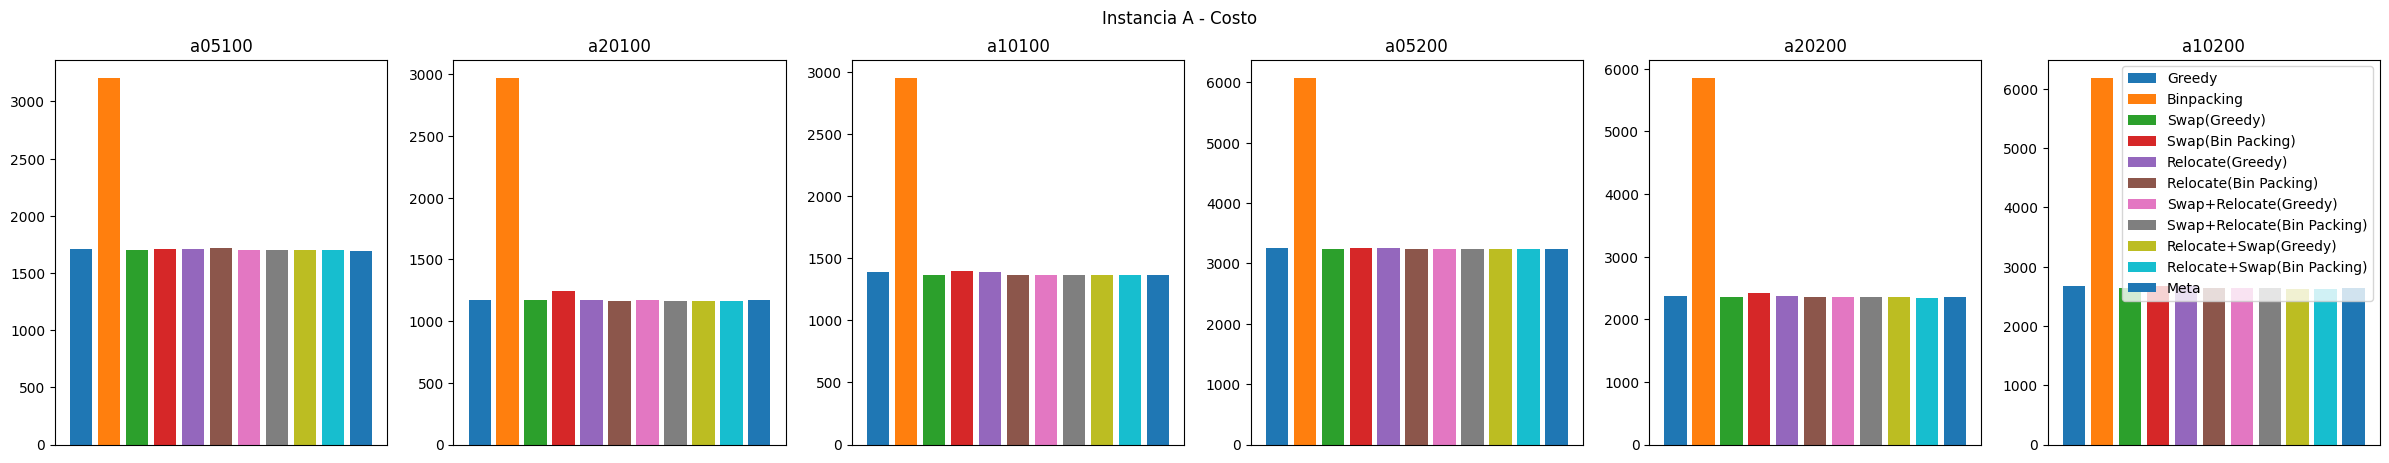

In [31]:
fig, axs = plt.subplots(1, len(a_instance), figsize=(30, 5))

for h in heuristics:
    # itter through a_instance rows
    for i in range(len(a_instance)):
        row = a_instance.iloc[i]
        axs[i].bar(h, row[h + "_cost"], label=h)

        # for tick in axs[i].get_xticklabels():
            # tick.set_rotation(90)

        # delete x_ticks
        axs[i].set_xticks([])

        axs[i].set_title(row["Filename"])
    
plt.legend()
fig.suptitle("Instancia A - Costo")

Text(0.5, 0.98, 'Instancia B - Costo')

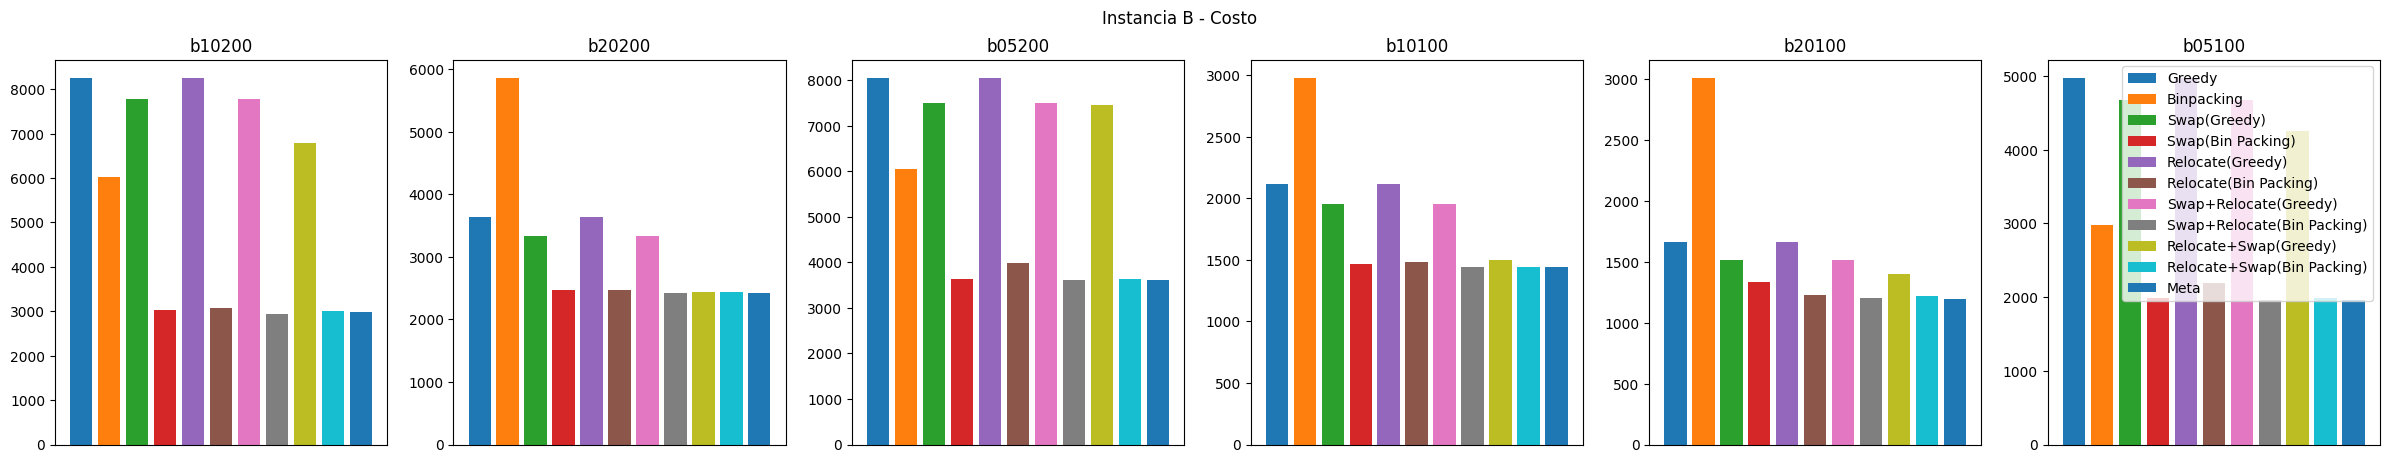

In [32]:
fig, axs = plt.subplots(1, len(b_instance), figsize=(30, 5))

for h in heuristics:
    # itter through b_instance rows
    for i in range(len(b_instance)):
        row = b_instance.iloc[i]
        axs[i].bar(h, row[h + "_cost"], label=h)

        # for tick in axs[i].get_xticklabels():
            # tick.set_rotation(90)

        # delete x_ticks
        axs[i].set_xticks([])

        axs[i].set_title(row["Filename"])
    
plt.legend()
fig.suptitle("Instancia B - Costo")

Text(0.5, 0.98, 'Instancia E - Costo')

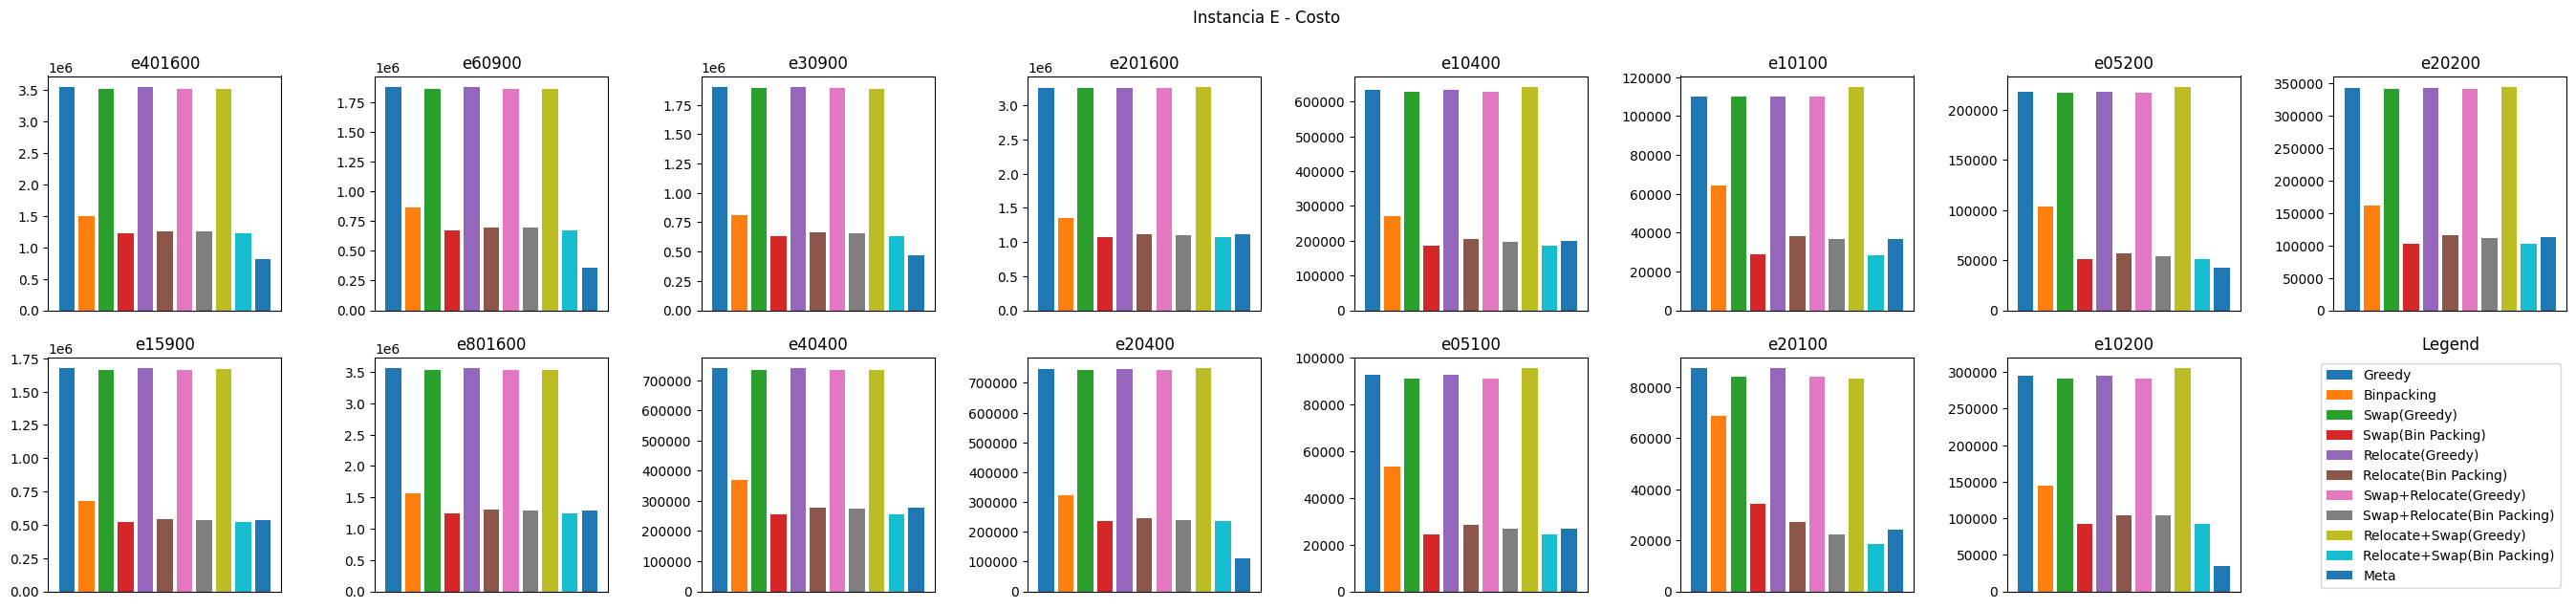

In [33]:
fig, axs = plt.subplots(2, len(e_instance)//2 + 1, figsize=(34, 7))

for h in heuristics:
    # itter through e_instance rows
    for i in range(len(e_instance)):
        row = e_instance.iloc[i]
        axs[i%2, i//2].bar(h, row[h + "_cost"], label=h)

        # for tick in axs[i].get_xticklabels():
            # tick.set_rotation(90)

        # delete x_ticks
        axs[i%2, i//2].set_xticks([])

        axs[i%2, i//2].set_title(row["Filename"])

    axs[1, len(e_instance)//2].bar(h, e_instance.iloc[-1][h + "_cost"], label=h, width=0)
    axs[1, len(e_instance)//2].set_xticks([])
    axs[1, len(e_instance)//2].set_yticks([])
    axs[1, len(e_instance)//2].set_title("Legend")
    # remove border
    axs[1, len(e_instance)//2].spines['top'].set_visible(False)
    axs[1, len(e_instance)//2].spines['right'].set_visible(False)
    axs[1, len(e_instance)//2].spines['bottom'].set_visible(False)
    axs[1, len(e_instance)//2].spines['left'].set_visible(False)


    
plt.legend()

#set space between subplots
plt.subplots_adjust(wspace=0.4, hspace=0.2)

fig.suptitle("Instancia E - Costo")

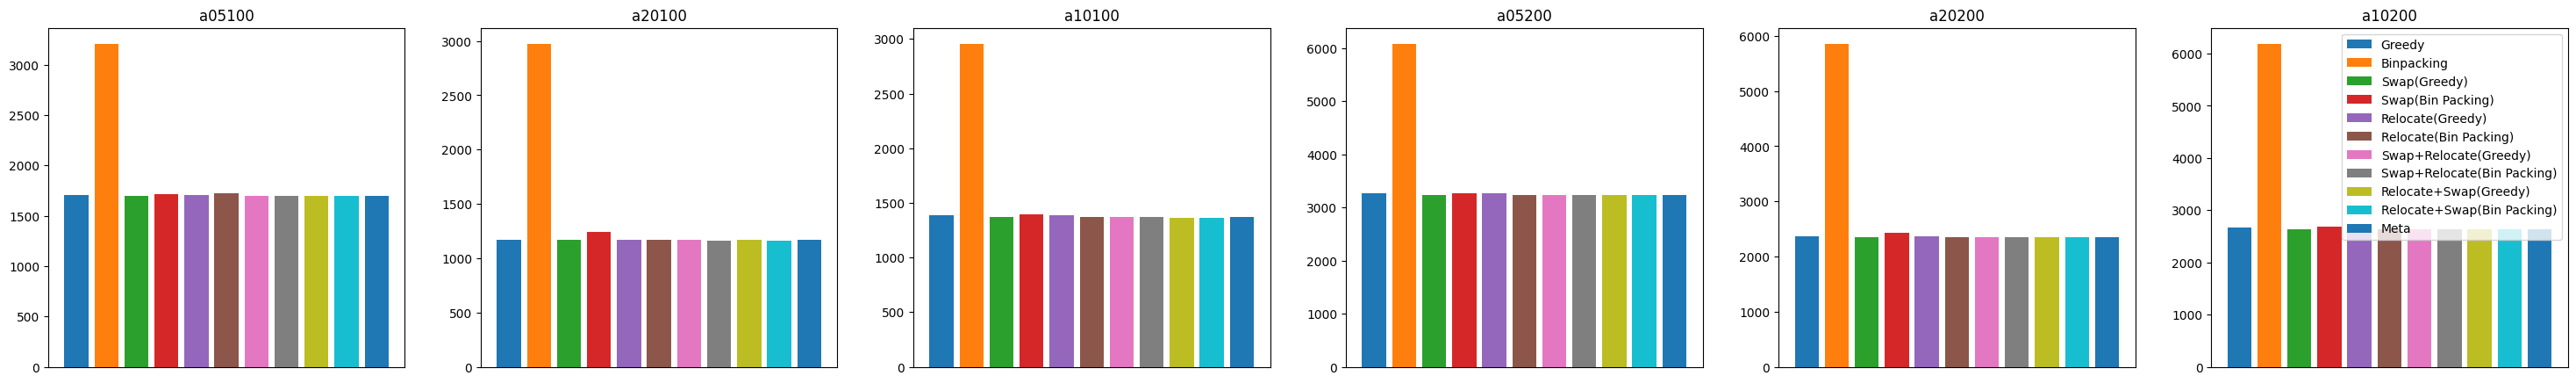

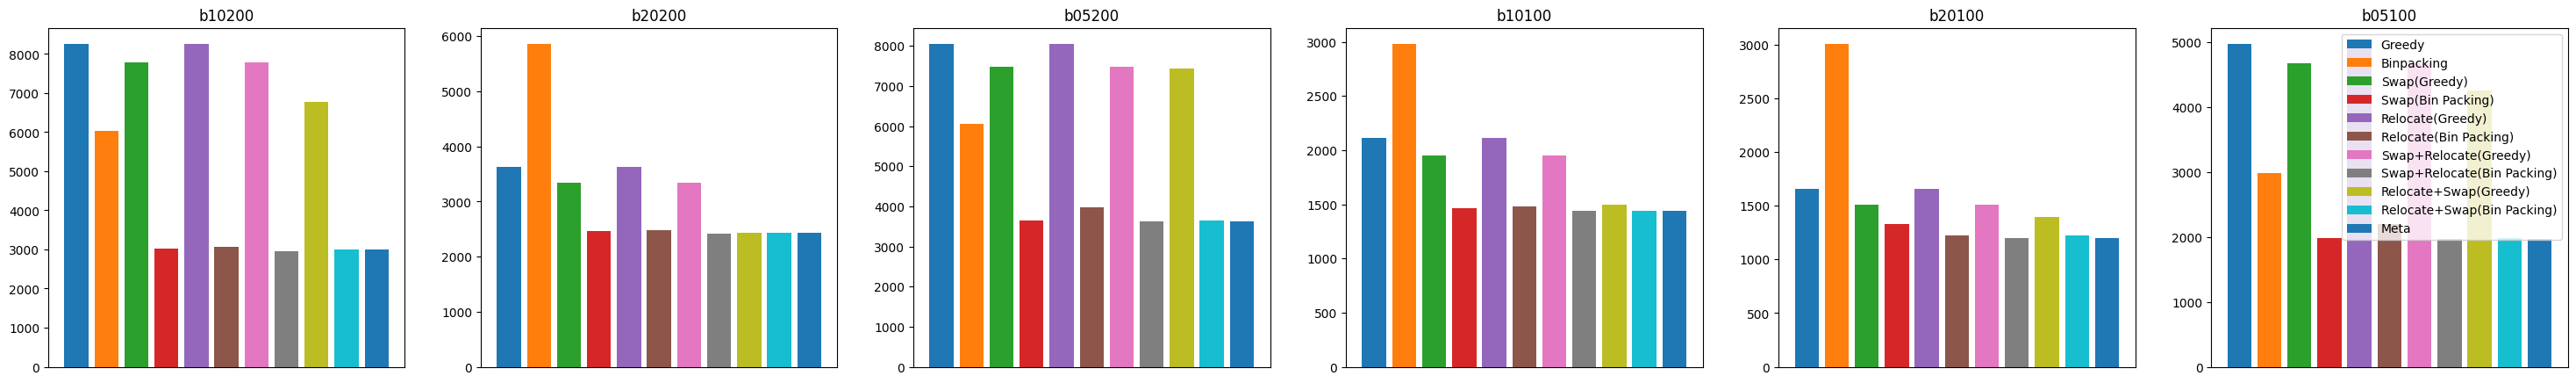

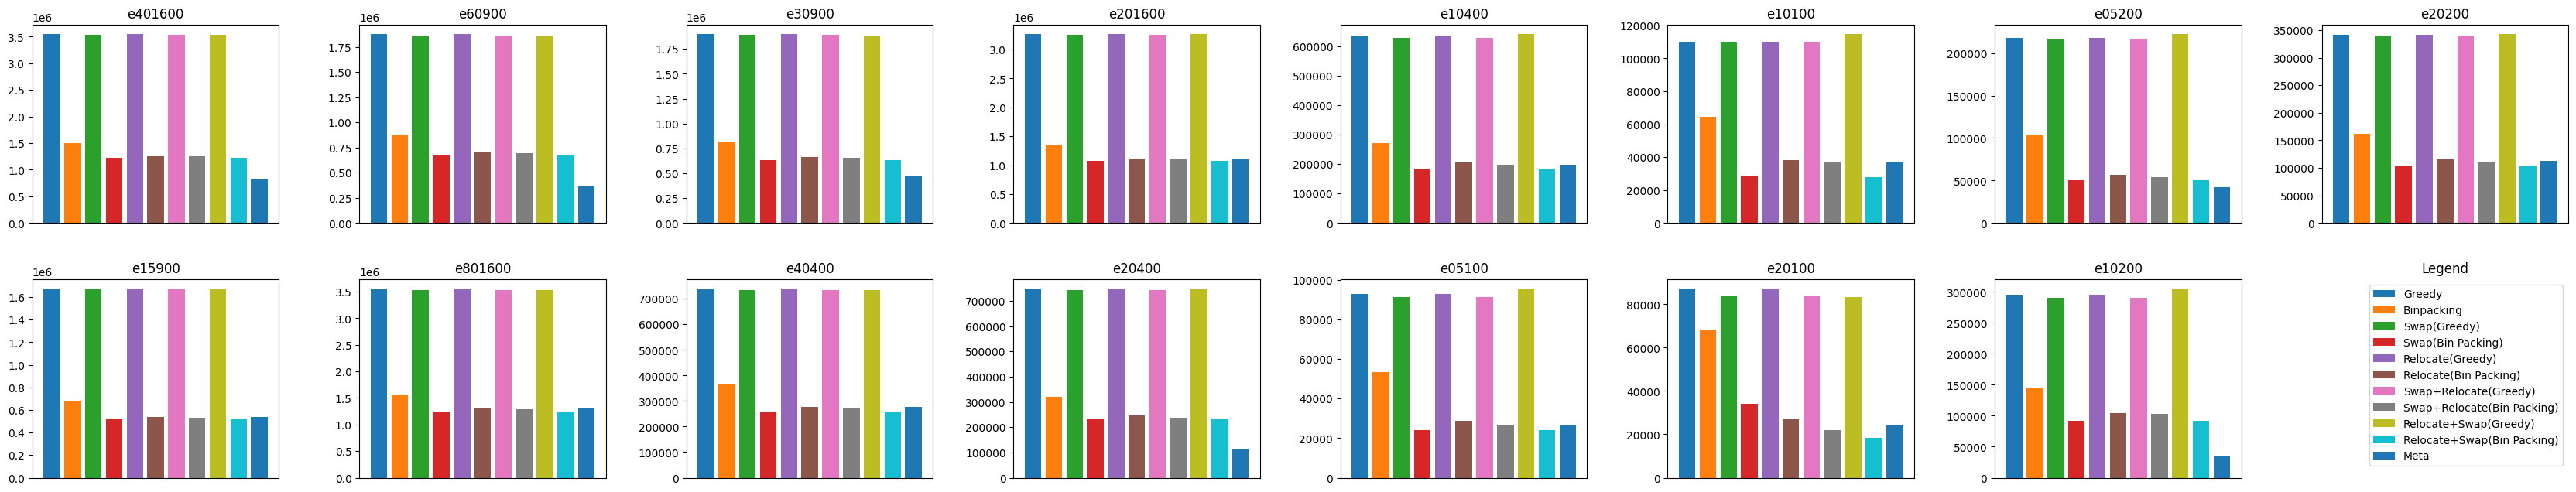

In [34]:
fig, axs = plt.subplots(1, len(a_instance), figsize=(30, 5))

for h in heuristics:
    # itter through a_instance rows
    for i in range(len(a_instance)):
        row = a_instance.iloc[i]
        axs[i].bar(h, row[h + "_cost"], label=h)

        # for tick in axs[i].get_xticklabels():
            # tick.set_rotation(90)

        # delete x_ticks
        axs[i].set_xticks([])

        axs[i].set_title(row["Filename"])
    
plt.legend()
#fig.suptitle("Instancia A - Costo")
fig.tight_layout(pad=3.0)
fig.savefig("../output/figures/instancia_a_costo.png")

fig, axs = plt.subplots(1, len(b_instance), figsize=(30, 5))

for h in heuristics:
    # itter through b_instance rows
    for i in range(len(b_instance)):
        row = b_instance.iloc[i]
        axs[i].bar(h, row[h + "_cost"], label=h)

        # for tick in axs[i].get_xticklabels():
            # tick.set_rotation(90)

        # delete x_ticks
        axs[i].set_xticks([])

        axs[i].set_title(row["Filename"])
    
plt.legend()
#fig.suptitle("Instancia B - Costo")
fig.tight_layout(pad=3.0)
fig.savefig("../output/figures/instancia_b_costo.png")

fig, axs = plt.subplots(2, len(e_instance)//2 + 1, figsize=(34, 7))

for h in heuristics:
    # itter through e_instance rows
    for i in range(len(e_instance)):
        row = e_instance.iloc[i]
        axs[i%2, i//2].bar(h, row[h + "_cost"], label=h)

        # for tick in axs[i].get_xticklabels():
            # tick.set_rotation(90)

        # delete x_ticks
        axs[i%2, i//2].set_xticks([])

        axs[i%2, i//2].set_title(row["Filename"])

    axs[1, len(e_instance)//2].bar(h, e_instance.iloc[-1][h + "_cost"], label=h, width=0)
    axs[1, len(e_instance)//2].set_xticks([])
    axs[1, len(e_instance)//2].set_yticks([])
    axs[1, len(e_instance)//2].set_title("Legend")
    # remove border
    axs[1, len(e_instance)//2].spines['top'].set_visible(False)
    axs[1, len(e_instance)//2].spines['right'].set_visible(False)
    axs[1, len(e_instance)//2].spines['bottom'].set_visible(False)
    axs[1, len(e_instance)//2].spines['left'].set_visible(False)


    
plt.legend()

#set space between subplots
plt.subplots_adjust(wspace=0.4, hspace=0.2)

#fig.suptitle("Instancia E - Costo")
fig.tight_layout(pad=3.0)
fig.savefig("../output/figures/instancia_e_costo.png")

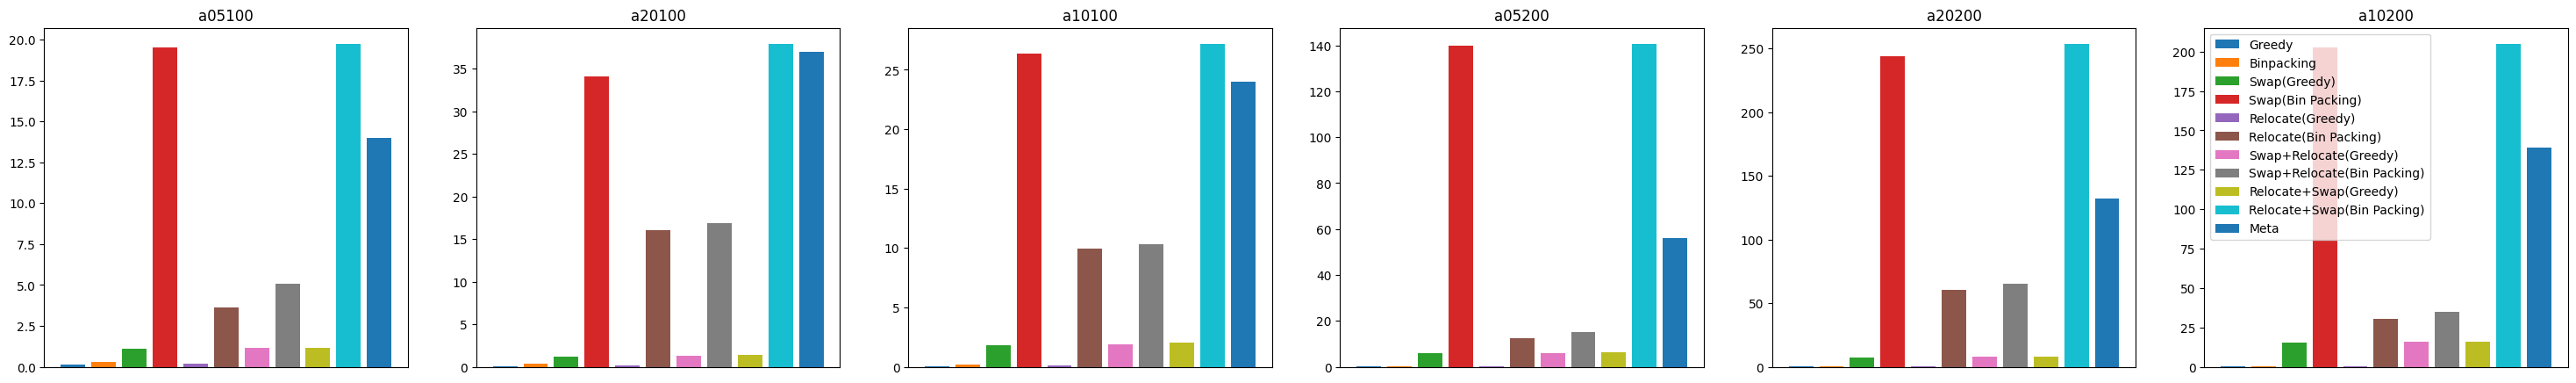

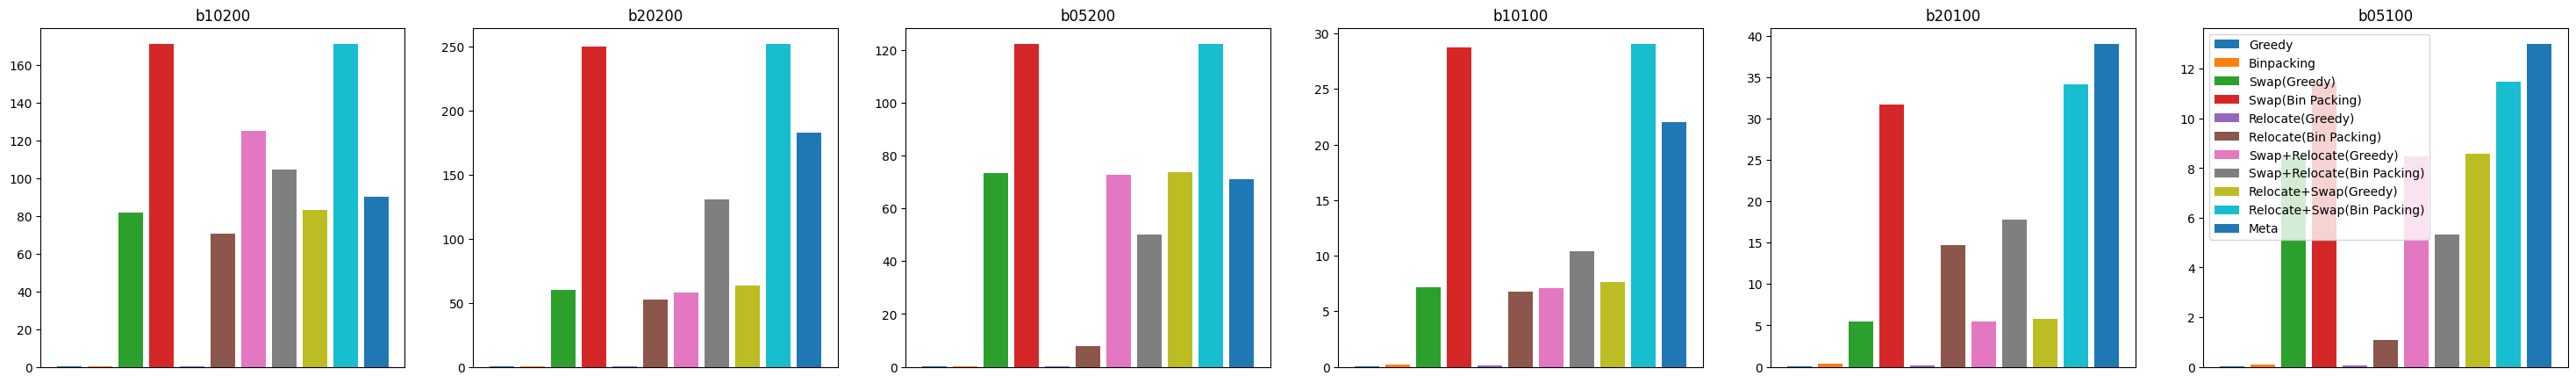

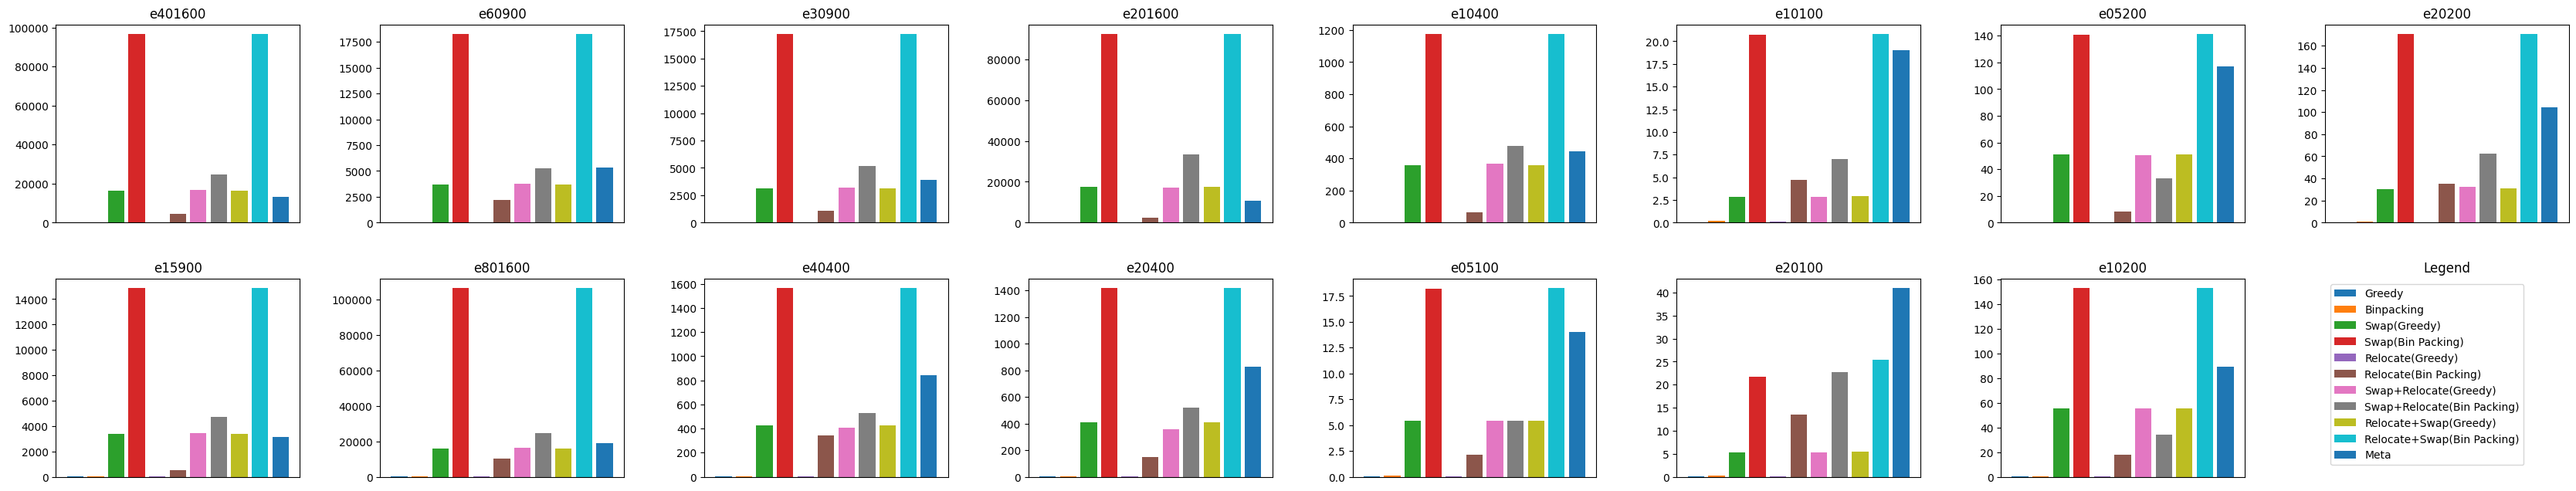

In [35]:
fig, axs = plt.subplots(1, len(a_instance), figsize=(30, 5))

for h in heuristics:
    # itter through a_instance rows
    for i in range(len(a_instance)):
        row = a_instance.iloc[i]
        axs[i].bar(h, row[h + "_time"], label=h)

        # for tick in axs[i].get_xticklabels():
            # tick.set_rotation(90)

        # delete x_ticks
        axs[i].set_xticks([])

        axs[i].set_title(row["Filename"])
    
plt.legend()
#fig.suptitle("Instancia A - Tiempo")
fig.tight_layout(pad=3.0)
fig.savefig("../output/figures/instancia_a_tiempo.png")

fig, axs = plt.subplots(1, len(b_instance), figsize=(30, 5))

for h in heuristics:
    # itter through b_instance rows
    for i in range(len(b_instance)):
        row = b_instance.iloc[i]
        axs[i].bar(h, row[h + "_time"], label=h)

        # for tick in axs[i].get_xticklabels():
            # tick.set_rotation(90)

        # delete x_ticks
        axs[i].set_xticks([])

        axs[i].set_title(row["Filename"])
    
plt.legend()
#fig.suptitle("Instancia B - Tiempo")
fig.tight_layout(pad=3.0)
fig.savefig("../output/figures/instancia_b_tiempo.png")

fig, axs = plt.subplots(2, len(e_instance)//2 + 1, figsize=(34, 7))

for h in heuristics:
    # itter through e_instance rows
    for i in range(len(e_instance)):
        row = e_instance.iloc[i]
        axs[i%2, i//2].bar(h, row[h + "_time"], label=h)

        # for tick in axs[i].get_xticklabels():
            # tick.set_rotation(90)

        # delete x_ticks
        axs[i%2, i//2].set_xticks([])

        axs[i%2, i//2].set_title(row["Filename"])

    axs[1, len(e_instance)//2].bar(h, e_instance.iloc[-1][h + "_time"], label=h, width=0)
    axs[1, len(e_instance)//2].set_xticks([])
    axs[1, len(e_instance)//2].set_yticks([])
    axs[1, len(e_instance)//2].set_title("Legend")
    # remove border
    axs[1, len(e_instance)//2].spines['top'].set_visible(False)
    axs[1, len(e_instance)//2].spines['right'].set_visible(False)
    axs[1, len(e_instance)//2].spines['bottom'].set_visible(False)
    axs[1, len(e_instance)//2].spines['left'].set_visible(False)


    
plt.legend()

#set space between subplots
plt.subplots_adjust(wspace=0.4, hspace=0.2)

#fig.suptitle("Instancia E - Tiempo")
fig.tight_layout(pad=3.0)
fig.savefig("../output/figures/instancia_e_tiempo.png")

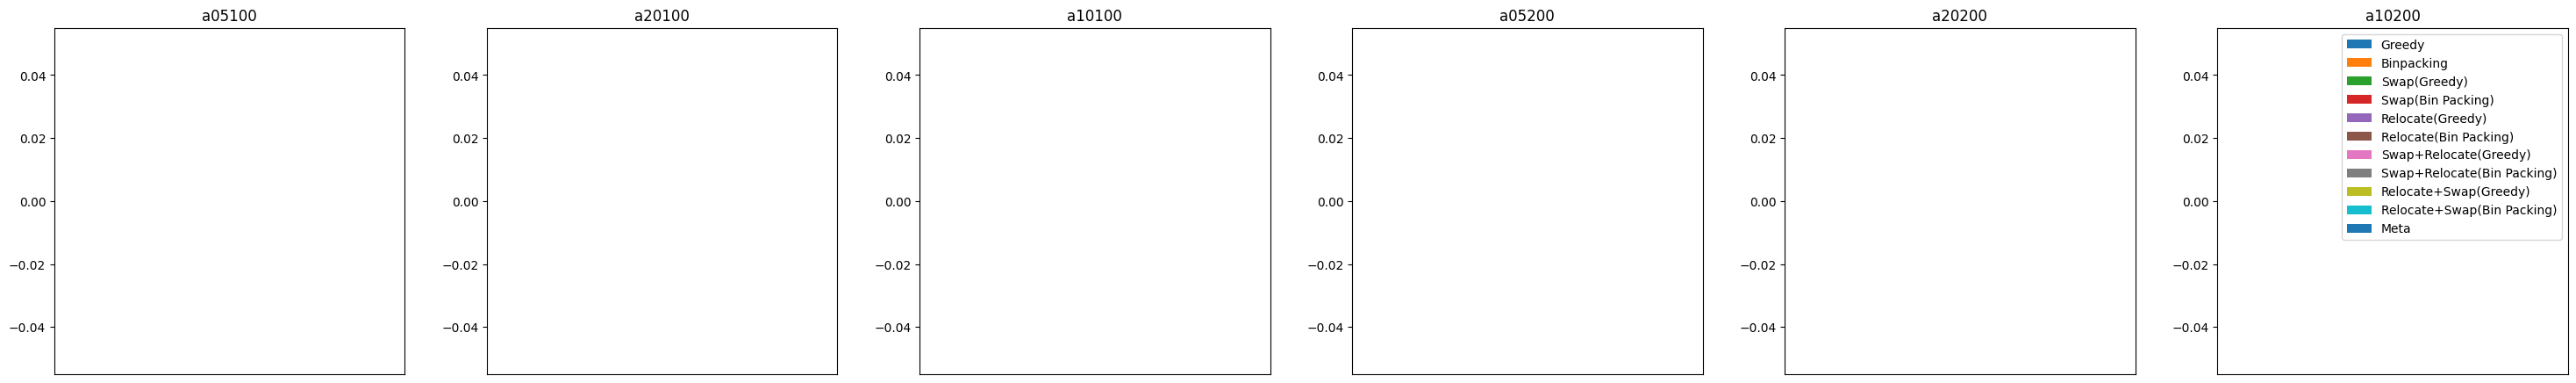

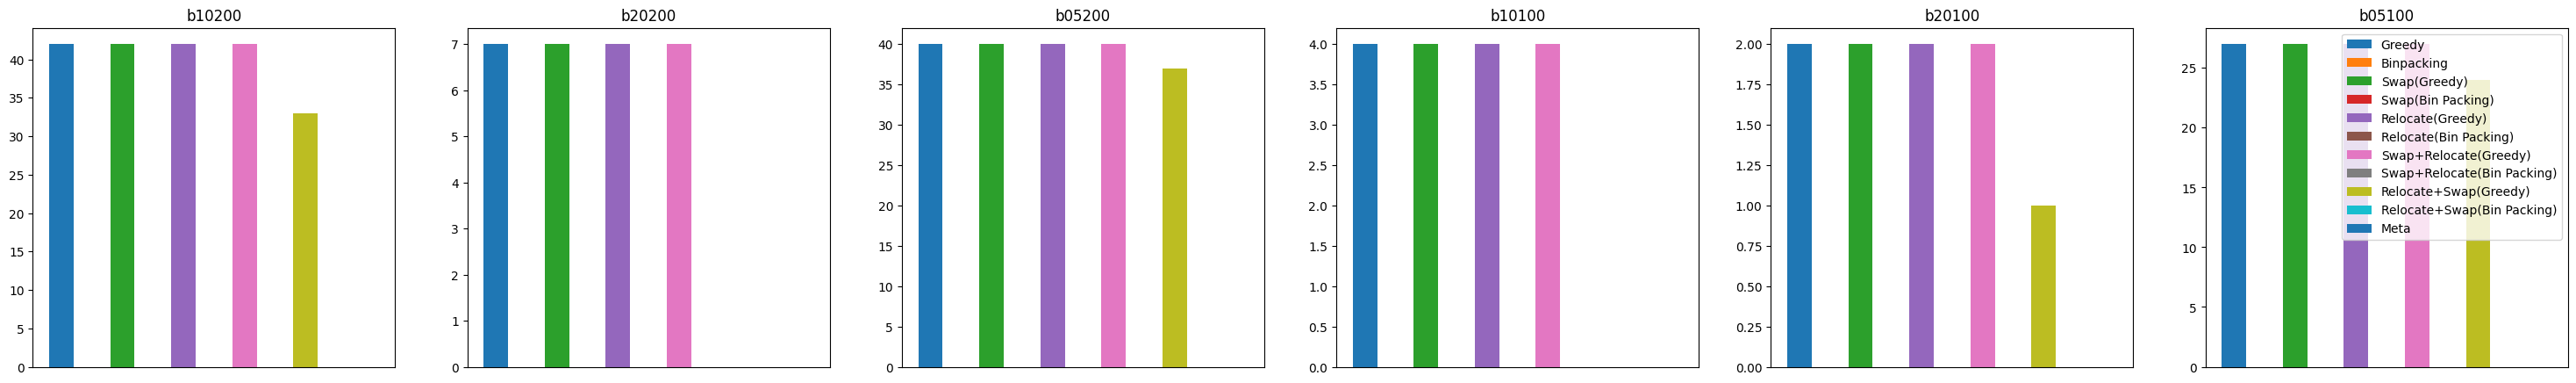

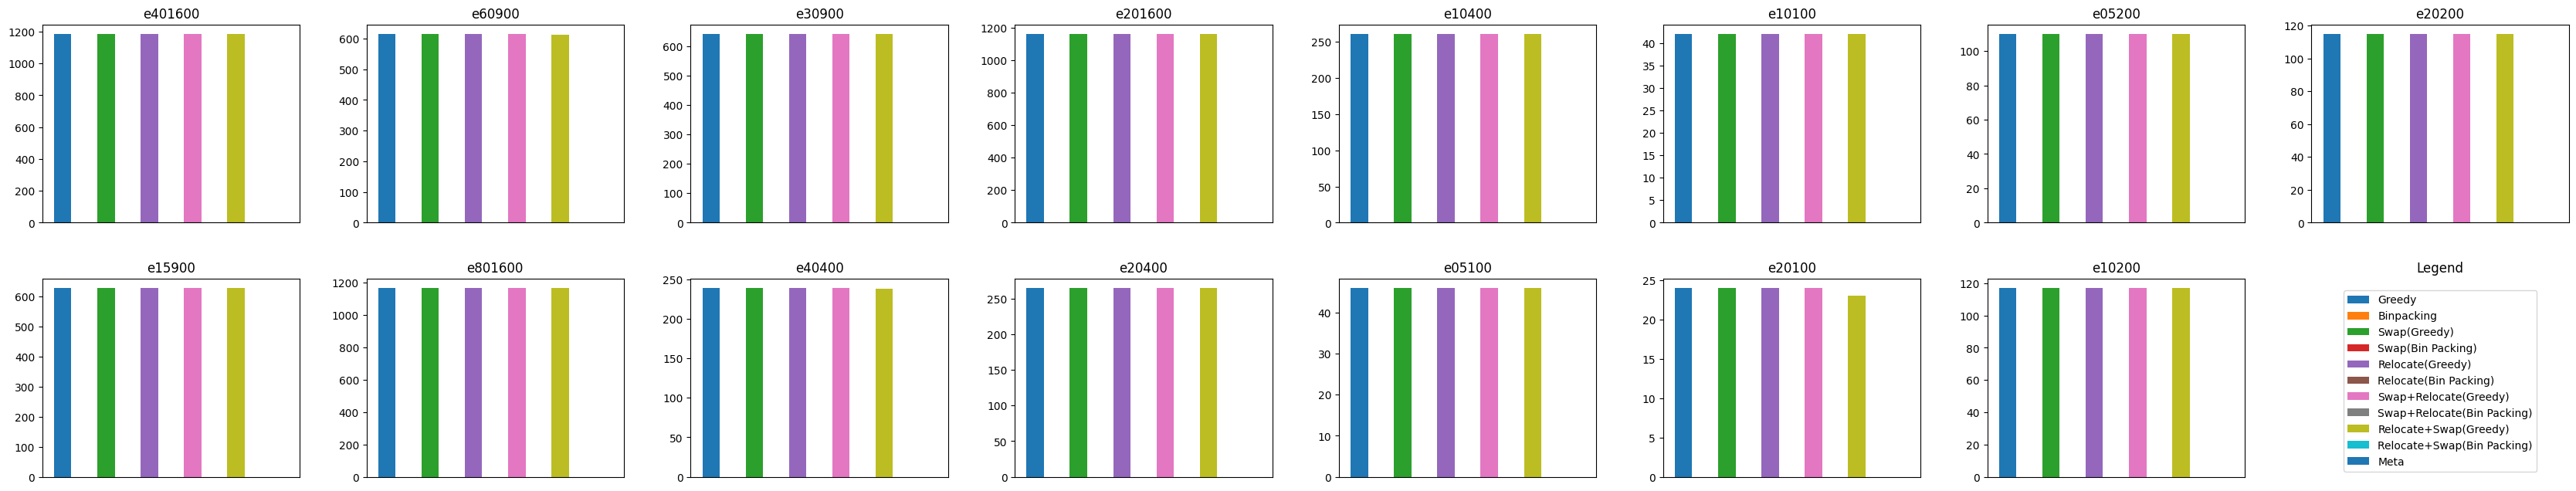

In [36]:
fig, axs = plt.subplots(1, len(a_instance), figsize=(30, 5))

for h in heuristics:
    # itter through a_instance rows
    for i in range(len(a_instance)):
        row = a_instance.iloc[i]
        axs[i].bar(h, row[h + "_free"], label=h)

        # for tick in axs[i].get_xticklabels():
            # tick.set_rotation(90)

        # delete x_ticks
        axs[i].set_xticks([])

        axs[i].set_title(row["Filename"])
    
plt.legend()
#fig.suptitle("Instancia A - Sin Asignar")
fig.tight_layout(pad=3.0)
fig.savefig("../output/figures/instancia_a_unassigned.png")

fig, axs = plt.subplots(1, len(b_instance), figsize=(30, 5))

for h in heuristics:
    # itter through b_instance rows
    for i in range(len(b_instance)):
        row = b_instance.iloc[i]
        axs[i].bar(h, row[h + "_free"], label=h)

        # for tick in axs[i].get_xticklabels():
            # tick.set_rotation(90)

        # delete x_ticks
        axs[i].set_xticks([])

        axs[i].set_title(row["Filename"])
    
plt.legend()
#fig.suptitle("Instancia B - Sin Asignar")
fig.tight_layout(pad=3.0)
fig.savefig("../output/figures/instancia_b_unassigned.png")

fig, axs = plt.subplots(2, len(e_instance)//2 + 1, figsize=(34, 7))

for h in heuristics:
    # itter through e_instance rows
    for i in range(len(e_instance)):
        row = e_instance.iloc[i]
        axs[i%2, i//2].bar(h, row[h + "_free"], label=h)

        # for tick in axs[i].get_xticklabels():
            # tick.set_rotation(90)

        # delete x_ticks
        axs[i%2, i//2].set_xticks([])

        axs[i%2, i//2].set_title(row["Filename"])

    axs[1, len(e_instance)//2].bar(h, e_instance.iloc[-1][h + "_free"], label=h, width=0)
    axs[1, len(e_instance)//2].set_xticks([])
    axs[1, len(e_instance)//2].set_yticks([])
    axs[1, len(e_instance)//2].set_title("Legend")
    # remove border
    axs[1, len(e_instance)//2].spines['top'].set_visible(False)
    axs[1, len(e_instance)//2].spines['right'].set_visible(False)
    axs[1, len(e_instance)//2].spines['bottom'].set_visible(False)
    axs[1, len(e_instance)//2].spines['left'].set_visible(False)


    
plt.legend()

#set space between subplots
plt.subplots_adjust(wspace=0.4, hspace=0.2)

#fig.suptitle("Instancia E - Sin Asignar")
fig.tight_layout(pad=3.0)
fig.savefig("../output/figures/instancia_e_unassigned.png")

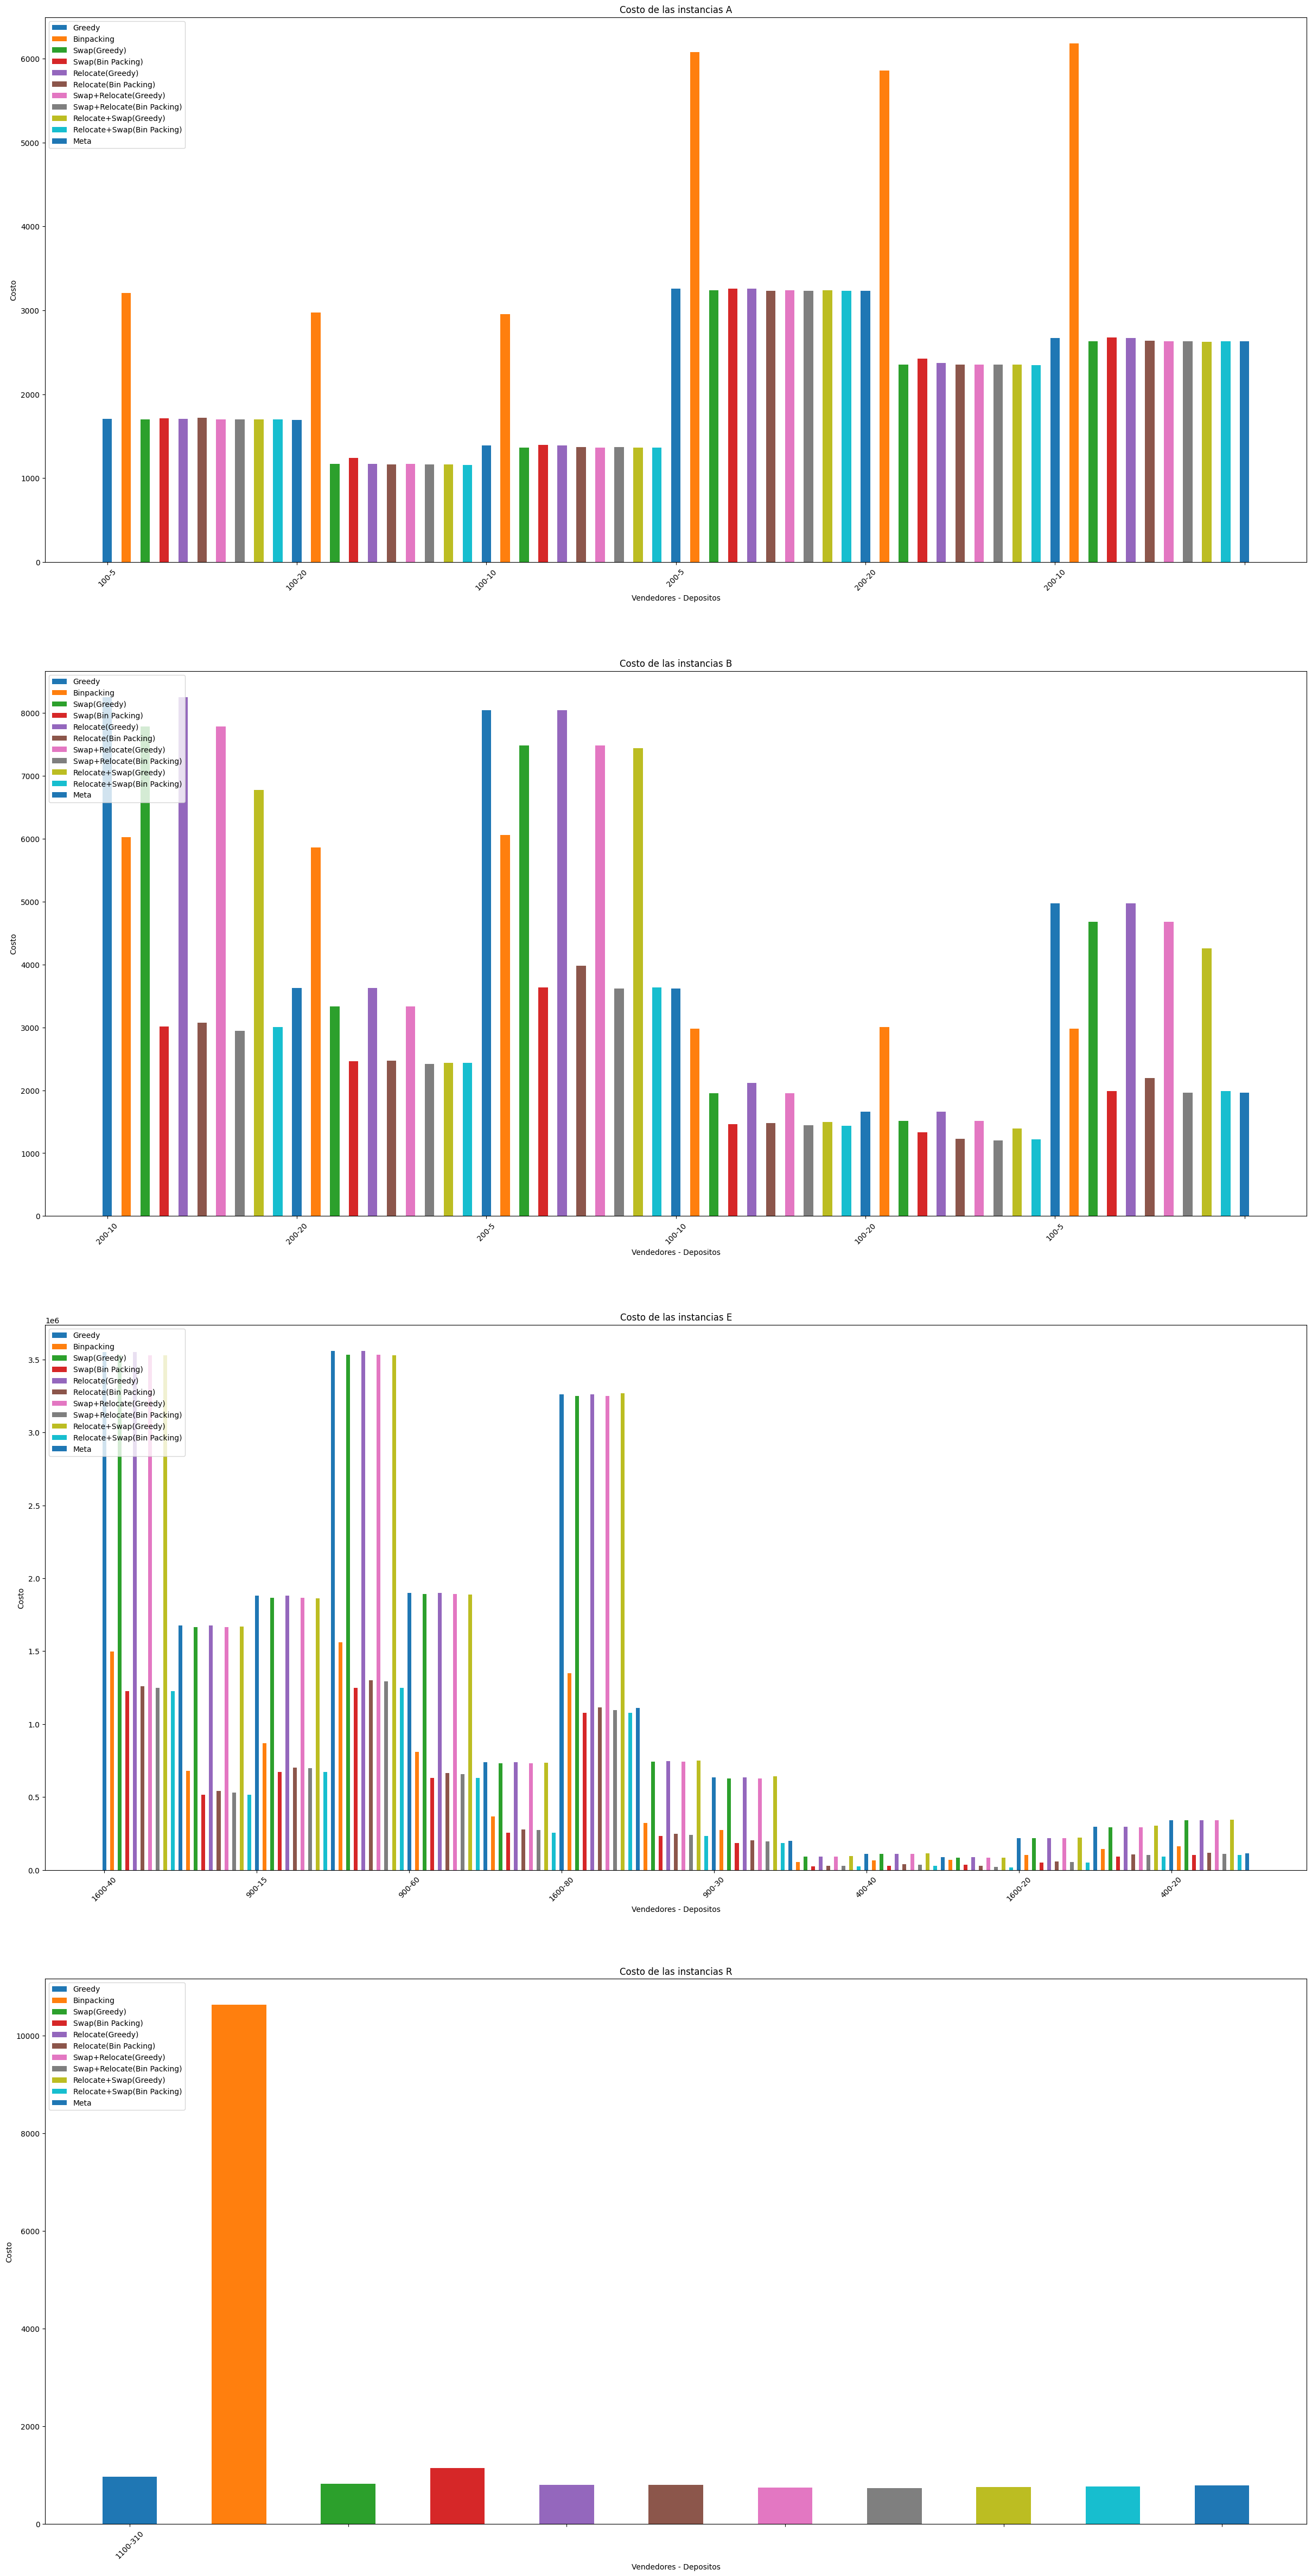

In [37]:
fig, axs = plt.subplots(len(costs), 1, figsize=(30, 60))

for i, cost in enumerate(costs):

    cost['Vendedores-Depositos'] = cost['Vendedores'].astype(str) + '-' + cost['Depositos'].astype(str)

    axs[i].set_title('Costo de las instancias ' + cost['InstanceGroup'].unique()[0].upper())
    axs[i].set_xlabel('Vendedores - Depositos')
    axs[i].set_ylabel('Costo')

    for h in heuristics:
        axs[i].bar(np.arange(len(cost['Vendedores-Depositos'])) + (heuristics == h).argmax() * 0.1, cost[h+"_cost"], width=0.05, label=h)

    axs[i].legend()

    # add division between 'Vendedores-Depositos'

    axs[i].set_xticklabels([""] + list(cost['Vendedores-Depositos']))



for i, ax in enumerate(axs):
    ax.set_xticklabels([""] + list(costs[i]['Vendedores-Depositos']))
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)
    ax.legend(loc='upper left')

    # leave some space between subplots



### 2. TIEMPOS

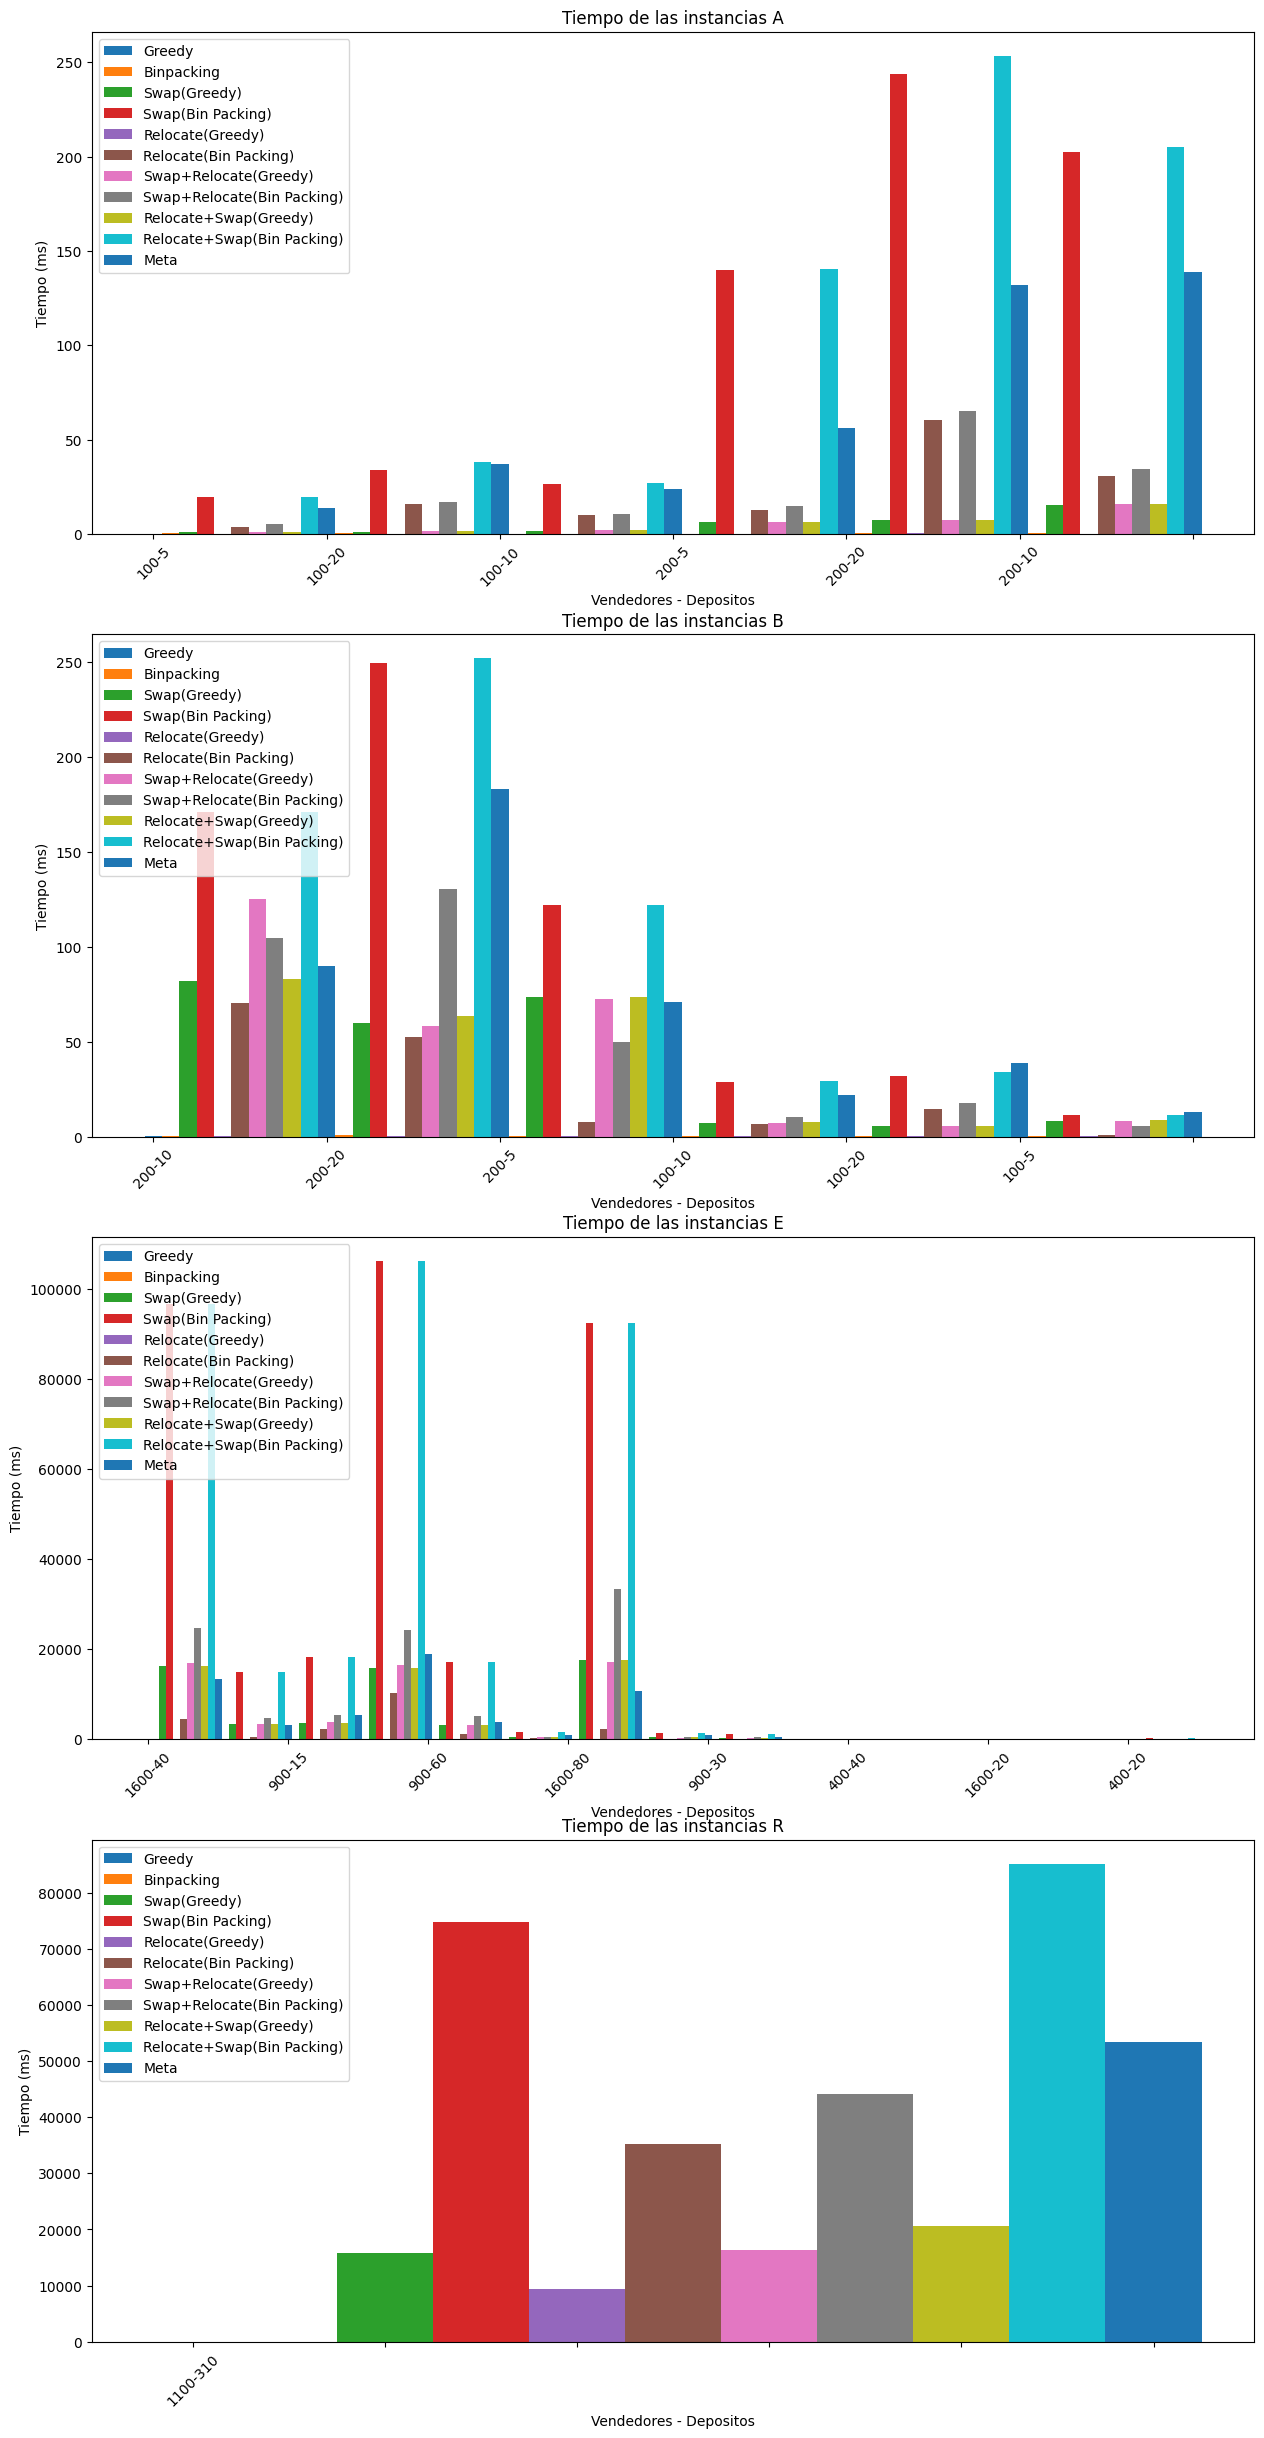

In [38]:
fig, axs = plt.subplots(len(times), 1, figsize=(15, 30))

for i, time in enumerate(times):

    time['Vendedores-Depositos'] = time['Vendedores'].astype(str) + '-' + time['Depositos'].astype(str)

    axs[i].set_title('Tiempo de las instancias ' + time['InstanceGroup'].unique()[0].upper())
    axs[i].set_xlabel('Vendedores - Depositos')
    axs[i].set_ylabel('Tiempo (ms)')

    for h in heuristics:
        # Bar plot
        axs[i].bar(np.arange(len(time['Vendedores-Depositos'])) + (heuristics == h).argmax() * 0.1, time[h+"_time"], width=0.1, label=h)

    axs[i].legend()

for i, ax in enumerate(axs):
    ax.set_xticklabels([""] + list(times[i]['Vendedores-Depositos']))
    # rotate x tick labels
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)
    ax.legend(loc='upper left')


## Cantidad de vendedores sin asignar

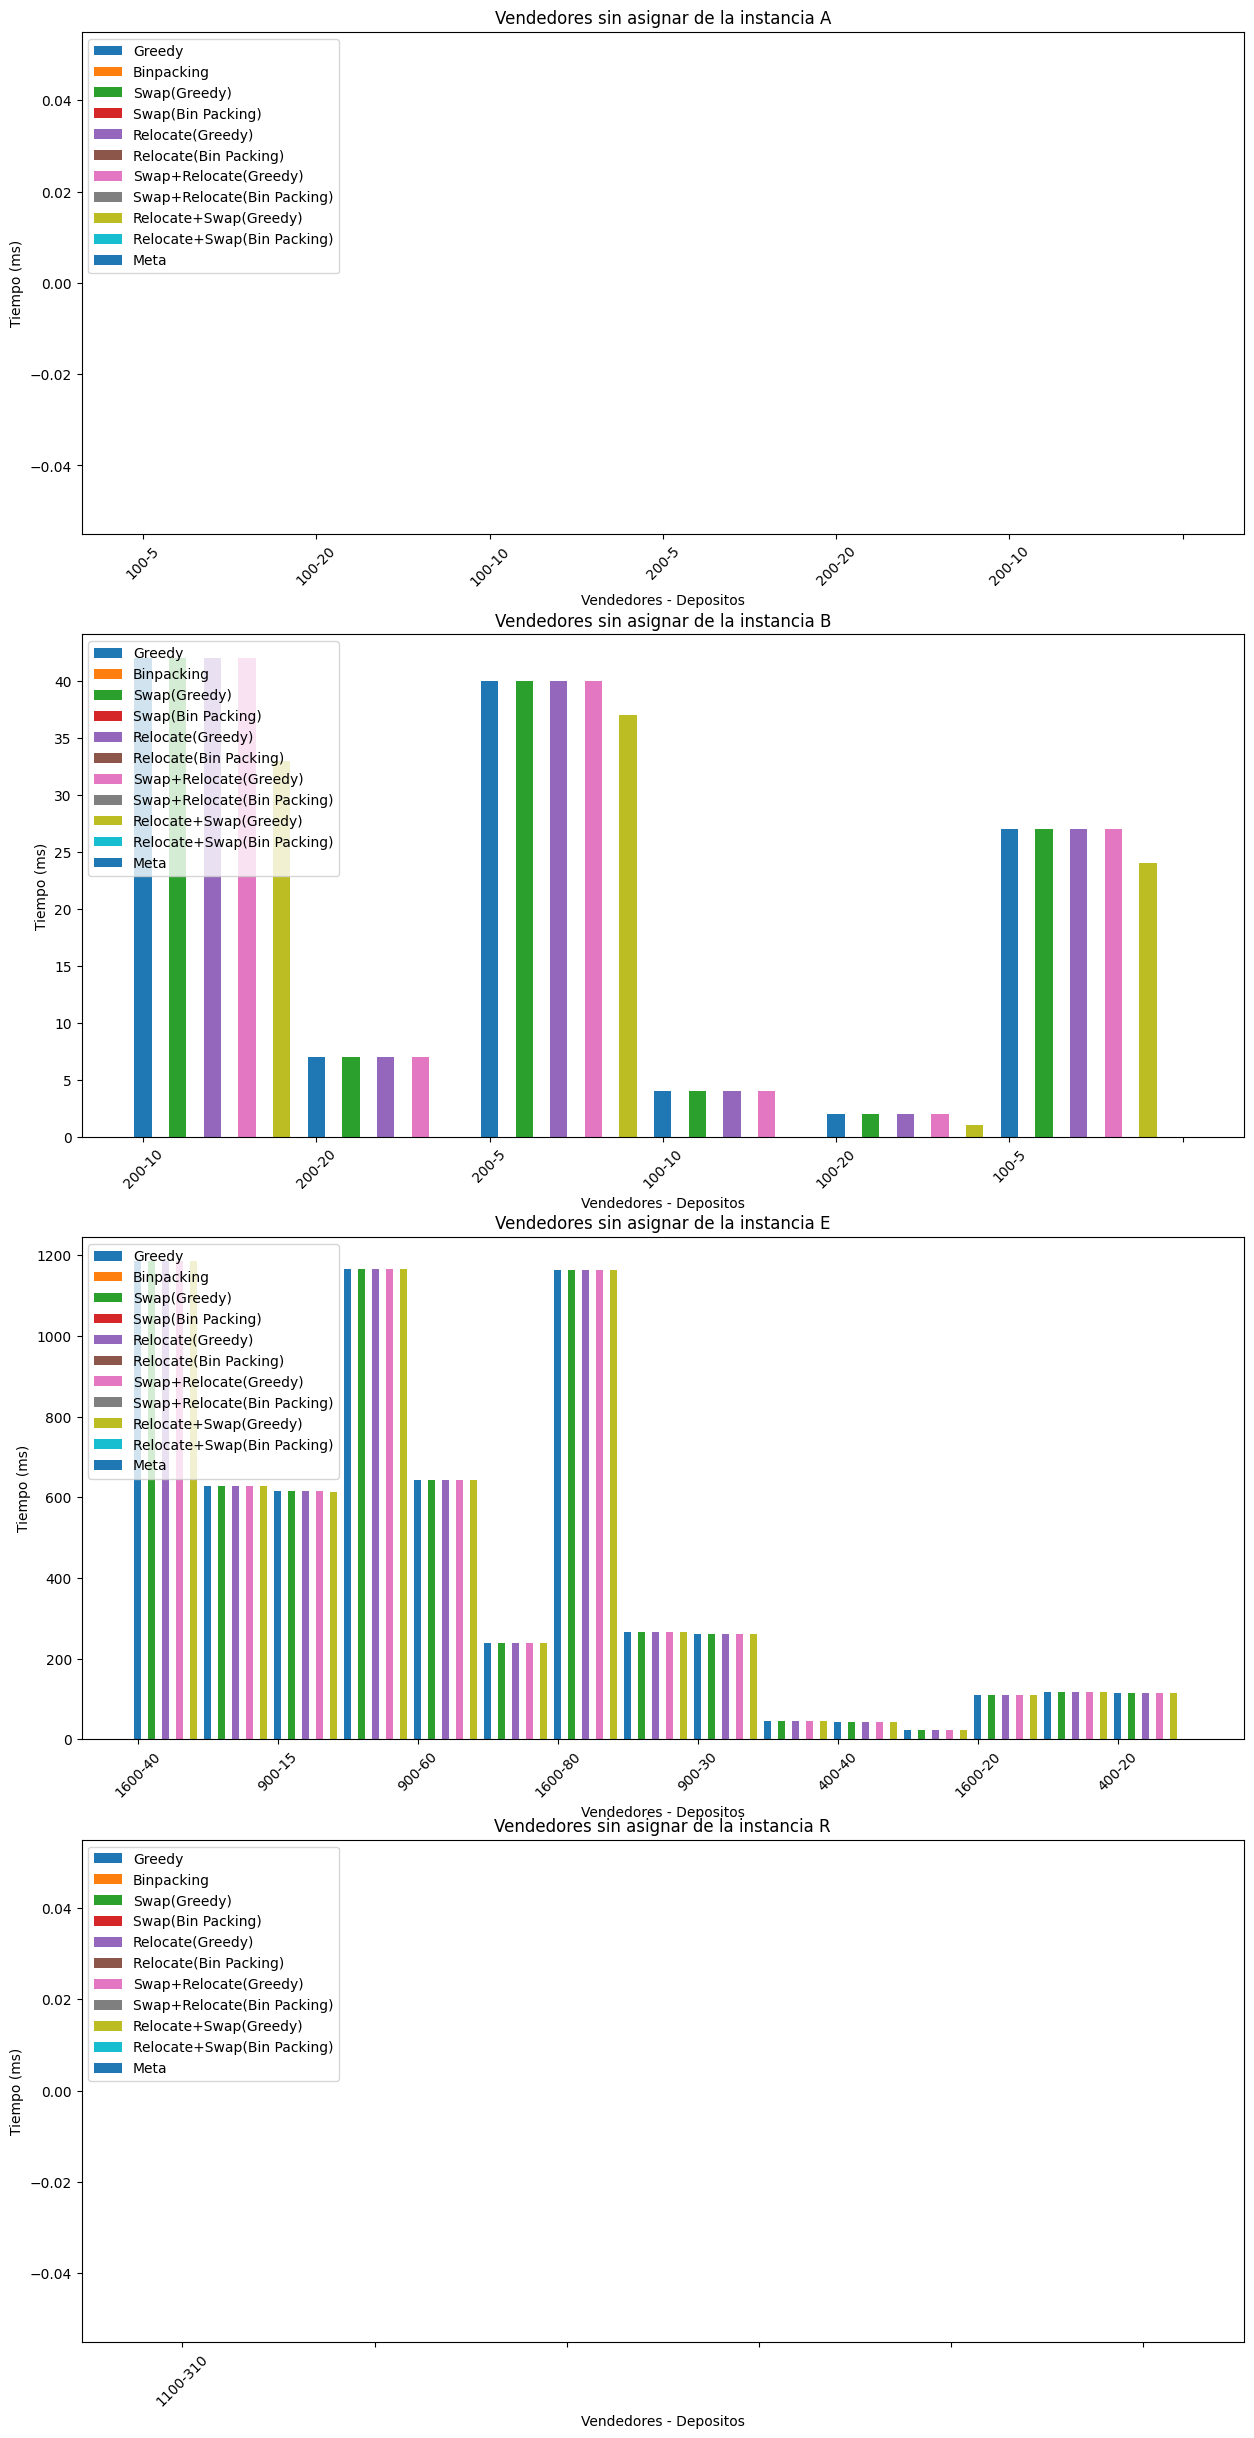

In [39]:
fig, axs = plt.subplots(len(frees), 1, figsize=(15, 30))

for i, free in enumerate(frees):

    free['Vendedores-Depositos'] = free['Vendedores'].astype(str) + '-' + free['Depositos'].astype(str)

    axs[i].set_title('Vendedores sin asignar de la instancia ' + free['InstanceGroup'].unique()[0].upper())
    axs[i].set_xlabel('Vendedores - Depositos')
    axs[i].set_ylabel('Tiempo (ms)')

    for h in heuristics:
        # Bar plot
        axs[i].bar(np.arange(len(free['Vendedores-Depositos'])) + (heuristics == h).argmax() * 0.1, free[h+"_free"], width=0.1, label=h)

    axs[i].legend()

for i, ax in enumerate(axs):
    ax.set_xticklabels([""] + list(frees[i]['Vendedores-Depositos']))
    # rotate x tick labels
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)
    ax.legend(loc='upper left')


### 3. INSTANCIA REAL

In [ ]:
real_instance[heuristics + '_cost']

In [ ]:
real_instance[heuristics + '_time']

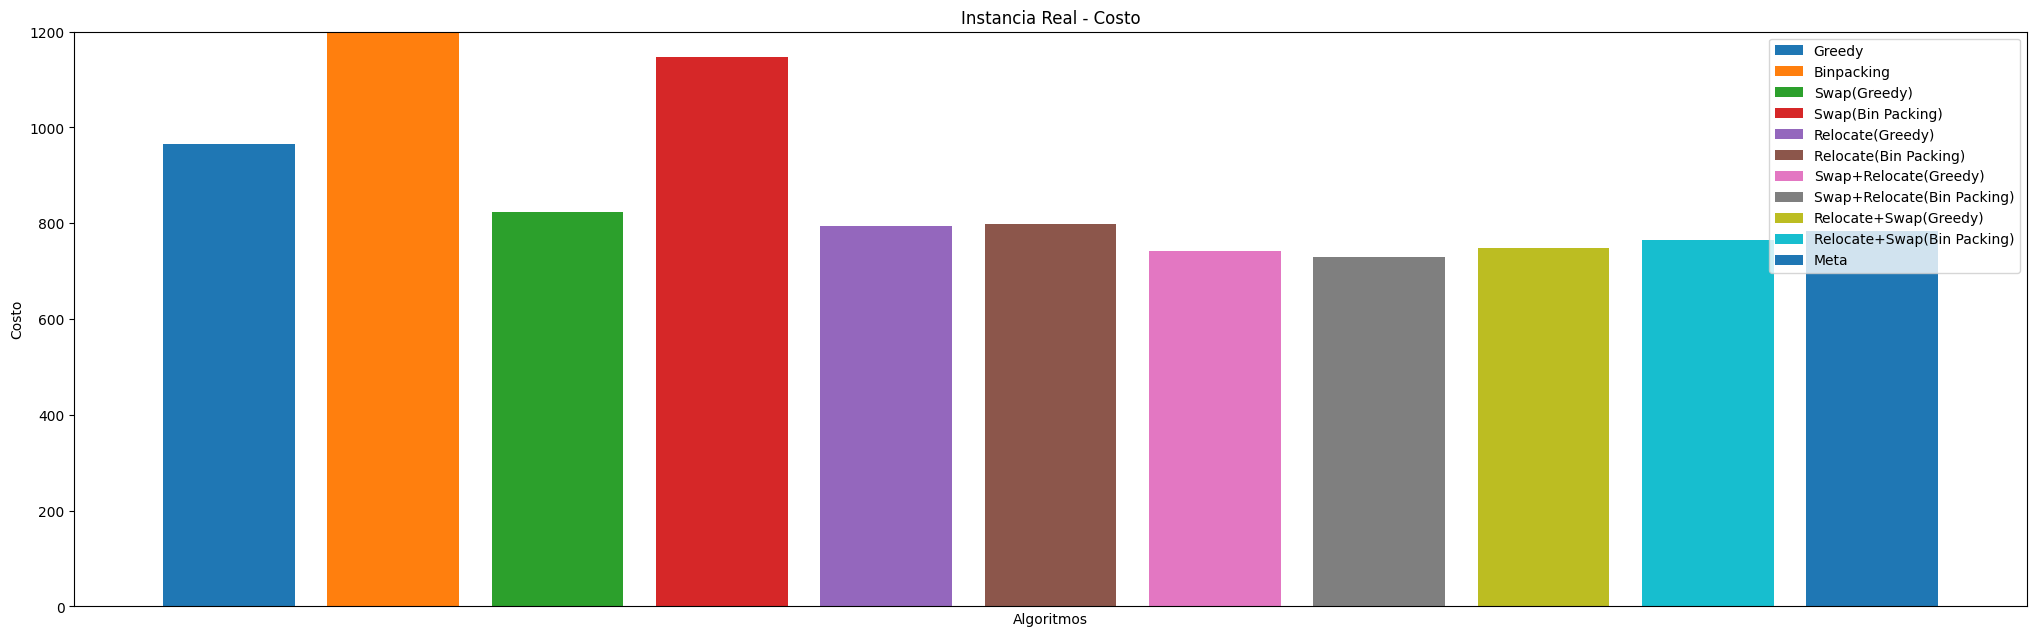

In [56]:
fig, ax = plt.subplots(1, 1, figsize=(21, 7))

for h in heuristics:
    # itter through real_instance rows
    row = real_instance.iloc[0]
    ax.bar(h, row[h + "_cost"], label=h)

    # for tick in ax.get_xticklabels():
        # tick.set_rotation(90)

    # delete x_ticks
    ax.set_xticks([])

    ax.set_title(row["Filename"])
    ax.set_xlabel("Algoritmos")
    ax.set_ylabel("Costo")
    ax.set_title("Instancia Real - Costo")
    ax.set_ylim(0, 1200)

plt.legend()
fig.tight_layout(pad=3.0)
fig.savefig("../output/figures/instancia_real_cost.png")

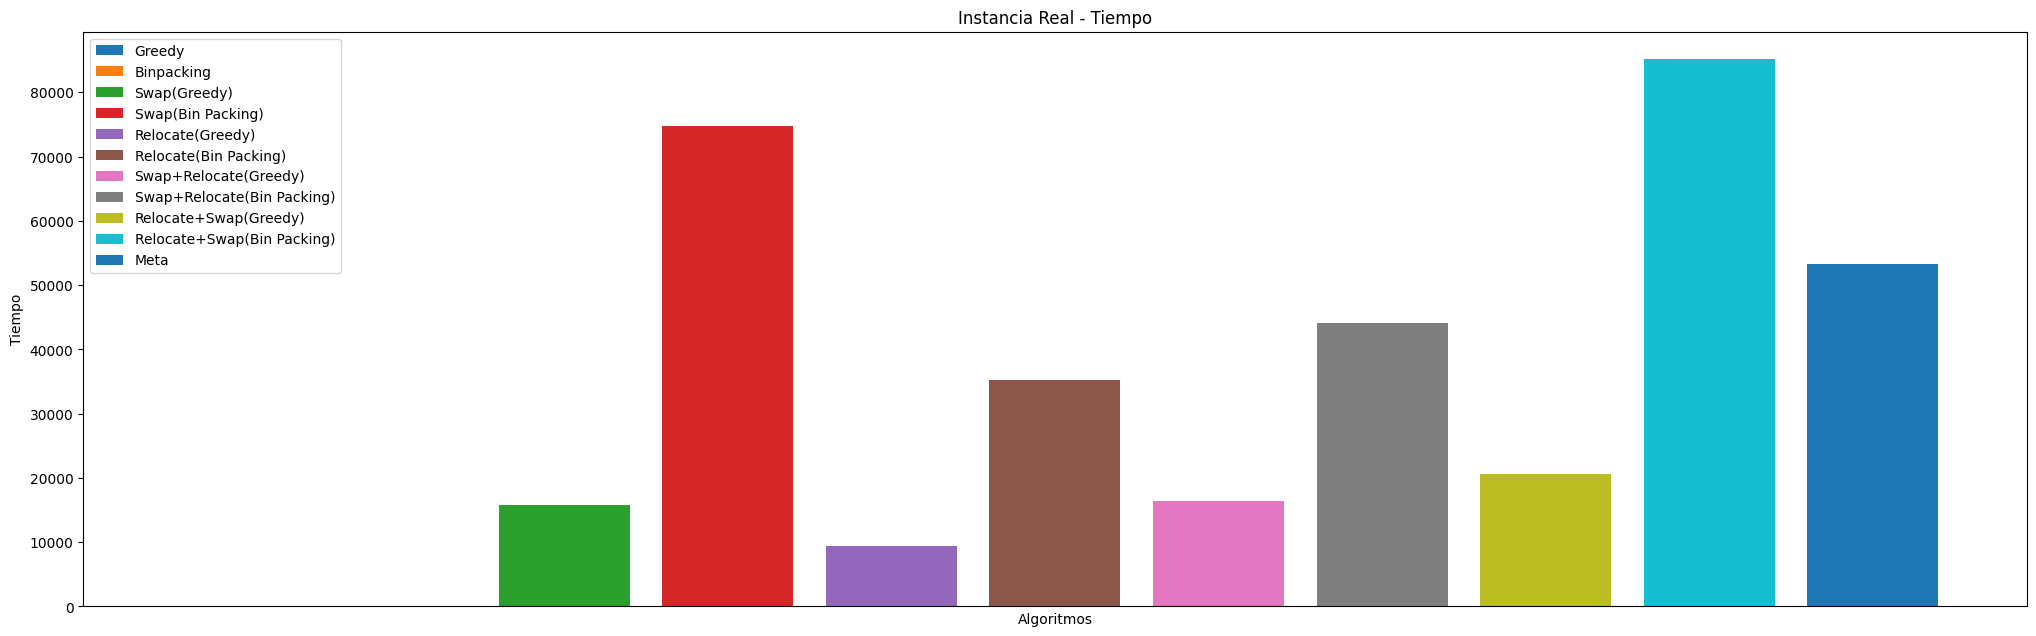

In [52]:
fig, ax = plt.subplots(1, 1, figsize=(21, 7))

for h in heuristics:
    # itter through real_instance rows
    row = real_instance.iloc[0]
    ax.bar(h, row[h + "_time"], label=h)

    # for tick in ax.get_xticklabels():
        # tick.set_rotation(90)

    # delete x_ticks
    ax.set_xticks([])

    ax.set_title(row["Filename"])
    ax.set_xlabel("Algoritmos")
    ax.set_ylabel("Tiempo")
    ax.set_title("Instancia Real - Tiempo")
    # ax.set_ylim(0, 1000)

plt.legend()
fig.tight_layout(pad=3.0)
fig.savefig("../output/figures/instancia_real_time.png")

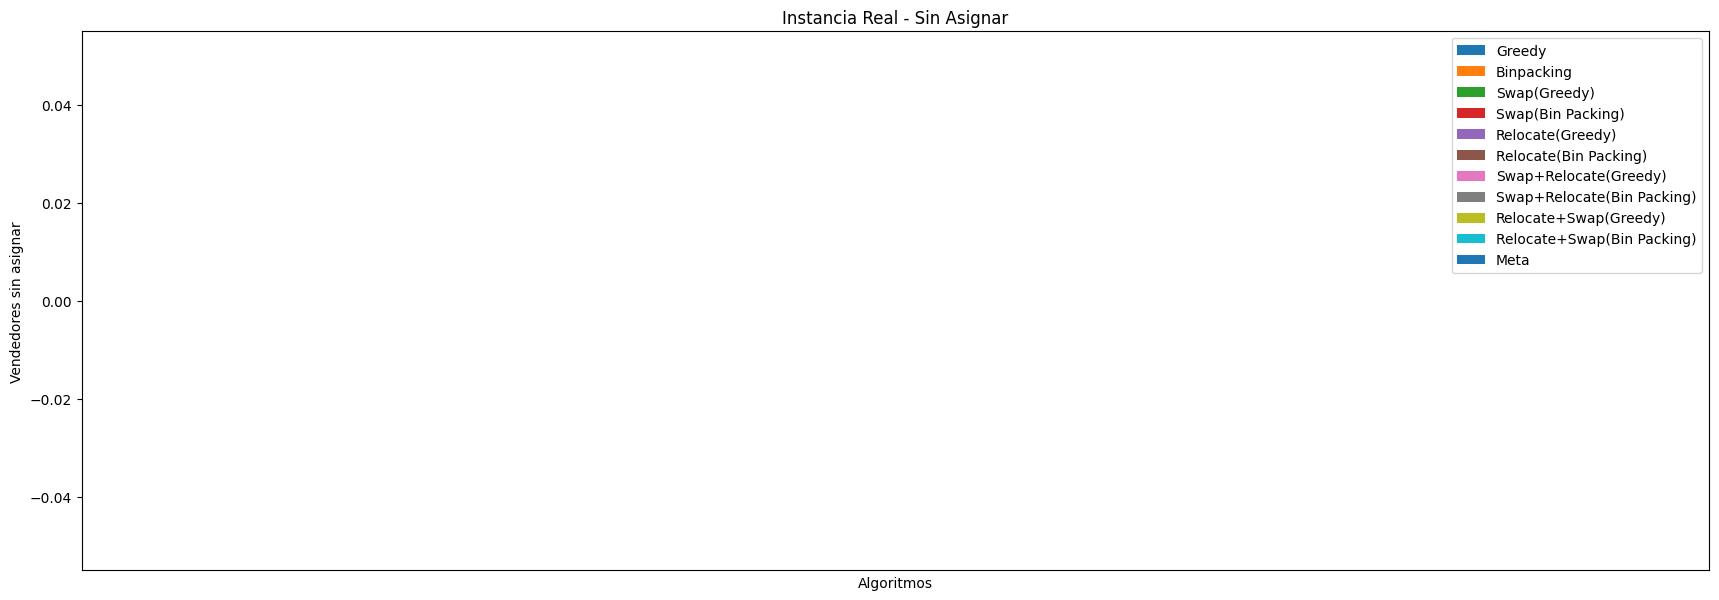

In [49]:
fig, ax = plt.subplots(1, 1, figsize=(21, 7))

for h in heuristics:
    # itter through real_instance rows
    row = real_instance.iloc[0]
    ax.bar(h, row[h + "_free"], label=h)

    # for tick in ax.get_xticklabels():
        # tick.set_rotation(90)

    # delete x_ticks
    ax.set_xticks([])

    ax.set_title(row["Filename"])
    ax.set_xlabel("Algoritmos")
    ax.set_ylabel("Vendedores sin asignar")
    ax.set_title("Instancia Real - Sin Asignar")
    # ax.set_ylim(0, 1000)

plt.legend()

In [ ]:
#Drop Filename column and InstanceGroup column
a_costs_table = costs[0].drop(columns=["Filename", "InstanceGroup", "Vendedores-Depositos"]).to_markdown(index=False)

pyperclip.copy(a_costs_table)

In [57]:
costs[-1]

,Filename,Depositos,Vendedores,Greedy_cost,Binpacking_cost,Swap(Greedy)_cost,Swap(Bin Packing)_cost,Relocate(Greedy)_cost,Relocate(Bin Packing)_cost,Swap+Relocate(Greedy)_cost,Swap+Relocate(Bin Packing)_cost,Relocate+Swap(Greedy)_cost,Relocate+Swap(Bin Packing)_cost,Meta_cost,InstanceGroup,Vendedores-Depositos
27,real_instance,310,1100,964.9,10629.0,824.2,1146.8,794.1,797.8,742.1,729.8,747.9,764.7,783.4,r,1100-310


In [58]:
#Drop Filename column and InstanceGroup column
real_costs_table = costs[-1].drop(columns=["Filename", "InstanceGroup", "Vendedores-Depositos"]).to_markdown(index=False)

pyperclip.copy(real_costs_table)